In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

2625938


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [3]:
import ImageAnalysis3 as ia3

In [4]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [5]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 18,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':1,
                     'max_num_seeds': 500,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907
-- 16 folders, 104 fovs detected.


In [6]:
_overwrite = False

_save_images = True

_warp_image = True

_fit_spots = True

sel_fov_ids = np.arange(0,60)
# 0-60: not warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    fov._save_to_file('merfish')
    fov._save_to_file('rna')
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 4.517s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
Reference channel: 637
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: /lab/weiss

-- start fitting spots in channel:748, 30 seeded with th=1000.0, 30 fitted in 173.137s.
-- start fitting spots in channel:637, 25 seeded with th=1000.0, 155 seeded with th=1000.0, 25 fitted in 180.548s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


155 fitted in 199.608s.
-- start fitting spots in channel:545, 36 seeded with th=1000.0, 17 seeded with th=1000.0, 35 fitted in 187.365s.
-- start fitting spots in channel:637, 17 fitted in 182.070s.
-- start fitting spots in channel:637, 38 seeded with th=1000.0, 38 fitted in 185.383s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 182.567s.
-- start fitting spots in channel:637, 46 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


46 fitted in 199.028s.
-- start fitting spots in channel:545, 28 seeded with th=1000.0, 28 fitted in 183.015s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 55 seeded with th=1000.0, 22 seeded with th=1000.0, 55 fitted in 191.569s.
-- start fitting spots in channel:545, 22 fitted in 189.102s.
-- start fitting spots in channel:545, 40 seeded with th=1000.0, 14 seeded with th=1000.0, 40 fitted in 186.973s.
-- start fitting spots in channel:545, 14 fitted in 183.639s.
-- start fitting spots in channel:545, 500 fitted in 231.452s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
-- updated spots for id:[1, 2, 3] in 0.524s
500 seeded with th=1000.0, 499 fitted in 241.909s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
-- updated spots for id:[4, 5, 6] in 0.040s
500 seeded with th=1000.0, 500 seeded wi

-- finish correction in 1401.479s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.952s
-- start fitting spots in channel:748, in 1343.291s
in 1327.975s
-- finish correction in 1400.839s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
-- finish correction in 1385.367s
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.481s
-- start fitting spots in channel:748, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_000.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 9.117s
-- start fitting spots in channel:748, 1 seeded with th=1000.0, 1 fitted in 187.661s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 193.843s.
-- s

-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5.
save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.546s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k09

-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
43 fitted in 175.294s.
-- start fitting spots in channel:637, -- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 7.982s
-- start fitting spots in channel:748, in 1406.118s
-- finish correction in 1461.986s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.356s
-- start fitting spots in channel:748, 147 seeded with th=1000.0, 147 fitted in 188.123s.
-- start fitting spots in channel:545, 33 seeded with th=1000.0, 33 fitted in 180.860s.
-- start fitting spots in channel:637, in 1439.306s
-- finish correction in 1499.156s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
-- updated

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.62  33.79 -14.85] 748, 637, 500 seeded with th=1000.0, 500 fitted in 258.634s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
-- updated spots for id:[1] in 0.013s
637, 637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1149.035s
-- finish correction in 1189.481s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.325s
-- start fitting spots in channel:748, in 1219.254s
-- finish correction in 1262.206s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_001.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.692s
-- start fitting spots in channel:748, 1 seeded with th=10

-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5, skip.
-- saving 545_chromatic_c

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 8.179s
-- start fitting spots in channel:748, in 1302.826s
-- finish correction in 1345.066s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.074s
-- start fitting spots in channel:748, 154 seeded with th=1000.0, 154 fitted in 191.192s.
-- start fitting spots in channel:637, in 1381.138s
-- finish correction in 1425.987s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 8.571s
-- start fitting spots in channel:748, in 1363.134s
-- finish correction in 1410.112s
- writting merfish info to file:/lab/weissman_imaging/puzh

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H14M15/Conv_zscan_002.dax in 5.371s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [  0.16  33.59 -15.72] in 3.446s.
 in 4.795s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.69  34.26 -15.85] in 8.700s.
in 10.377s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ -0.06  33.46 -15.56] in 8.498s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.2   33.77 -15.71] in 20.928s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.2   33.77 -15.71] 748, in 8.580s
-- illumination correction for channels: 748, 637, 545, 477, in 5.263s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [  0.24  33.71 -13.95] in 3.724s.
-- dri

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


2 fitted in 178.713s.
-- start fitting spots in channel:637, in 1255.372s
-- finish correction in 1300.548s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[105, 104, 103], drifts for id:[105, 104, 103] in 8.315s
-- start fitting spots in channel:748, in 1306.334s
-- finish correction in 1355.131s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 8.531s
-- start fitting spots in channel:748, 1 seeded with th=1000.0, 1 fitted in 174.703s.
-- start fitting spots in channel:637, in 1295.166s
-- finish correction in 1347.876s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.075s
-- start fitting

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


222 fitted in 204.012s.
-- start fitting spots in channel:637, 101 fitted in 193.344s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 500 fitted in 289.770s.
-- start fitting spots in channel:637, 29 fitted in 185.303s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 186.449s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 3 seeded with th=1000.0, 3 fitted in 186.717s.
-- start fitting spots in channel:637, 500 fitted in 262.770s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_002.hdf5
-- updated spots for id:[99, 98, 97] in 0.551s
8 seeded with th=1000.0, 500 seeded with th=1000.0, 8 fitted in 184.492s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 3 seeded with th=1000.0, 3 fitted in 183.495s.
-- start fitting spots in channel:545, 7 fitted in 183.001s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_003.dax  in 5.817s
-- removing hot pixels for channels:['405'] in 2.736s
-- illumination correction for channels: 405, in 1.368s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.239s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
++ base attributes saved:['dapi_im'] in 1.581s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_003.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_003.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:637, 45 seeded with th=1000.0, 45 fitted in 186.774s.
-- start fitting spots in channel:637, 14 seeded with th=1000.0, 14 fitted in 184.549s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 231.024s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[1, 2, 3] in 0.584s
37 seeded with th=1000.0, 37 fitted in 180.947s.
-- start fitting spots in channel:545, 107 seeded with th=1000.0, 500 seeded with th=1000.0, 107 fitted in 190.742s.
-- start fitting spots in channel:545, 44 seeded with th=1000.0, 44 fitted in 176.235s.
-- start fitting spots in channel:545, 52 seeded with th=1000.0, 52 fitted in 176.674s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 236.597s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[4, 5, 6] in 0.040s
500 seeded with th=1000.0, 500 fitted in 198.958s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[7, 8, 9] in 0.036s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 168.504s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[13, 14, 15] in 0.035s
500 seeded with th=1000.0, 500 fitted in 157.155s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[10, 11, 12] in 0.035s
482 fitted in 152.120s.
- writting merfish spots in

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.398s
-- start fitting spots in channel:748, in 1306.532s
-- finish correction in 1363.766s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.281s
-- start fitting spots in channel:748, 6 seeded with th=1000.0, 6 fitted in 179.314s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 251 seeded with th=1000.0, 251 fitted in 203.742s.
-- start fitting spots in channel:637, 59 seeded with th=1000.0, 59 fitted in 188.219s.
-- start fitting spots in channel:545, 500 fitted in 296.802s.
-- start fitting spots in channel:637, 24 seeded with th=1000.0, 24 fitted in 188.243s.
-- start fitting spots in channel:637, 25 seeded with th=100

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


498 fitted in 156.856s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[114, 113, 112] in 0.024s
490 fitted in 145.743s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
-- updated spots for id:[117, 116, 115] in 0.018s
, finish in 2114.73s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_003.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.274s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed c

+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_004.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_004.hdf5 in 0.454s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_004.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_004.dax  in 1.403s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.589s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.922s
-- illumination correctio

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


in 1377.134s
-- finish correction in 1421.357s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
162 fitted in 216.484s.
-- start fitting spots in channel:637, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 8.446s
-- start fitting spots in channel:748, in 1407.034s
-- finish correction in 1455.183s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.291s
-- start fitting spots in channel:748, 41 seeded with th=1000.0, 41 fitted in 178.385s.
-- start fitting spots in channel:637, in 1411.510s
-- finish correction in 1475.831s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_004.hdf5
in 1393.347s
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.623s
-- start fi

-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [  0.1   34.85 -15.08] in 9.061s.
in 10.276s
-- illumination correction for channels: 748, 637, 545, 477, -- drift 2: [ 1.000e-02  3.501e+01 -1.515e+01] in 9.360s.in 5.127s
-- apply bead_drift calculate for channel: 477

-- start aligning given source image to given reference image.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.09  34.91 -15.02] in 21.869s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[  0.09  34.91 -15.02] 748, -- drift 0: [  0.17  34.77 -13.36] in 3.723s.
-- drift 1: [  0.1   34.72 -13.61] in 11.457s.
-- drift 2: [ 2.000e-02  3.489e+01 -1.368e+01] in 10.465s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [  0.1   34.79 -13.55] in 25.937s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[  0.1   34.79 -13.55] 748, 637, 211 seeded with th=1000.0, 211 f

-- saving 748_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 1.08 39.49 -9.53] in 1.974s.
 in 4.773s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 1.08 39.36 -9.56] in 2.463s.
-- drift 2: [ 1.11 39.48 -9.59] in 2.435s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 1.09 39.44 -9.56] in 6.939s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ 1.09 39.44 -9.56] 748, in 10.049s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.043s
-- illumination correction for channels: 748, 637, 545, 477, in 5.440s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H3M4/Conv_zscan_005.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_005.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 143.779s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[16, 17, 18] in 0.017s
, finish in 2220.93s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.259s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_005.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_005.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_005.dax  in 1.143s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


50 seeded with th=1000.0, 50 fitted in 184.232s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


15 fitted in 184.890s.
-- start fitting spots in channel:637, 91 seeded with th=1000.0, 5 seeded with th=1000.0, 91 fitted in 194.665s.
-- start fitting spots in channel:637, 5 fitted in 185.887s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 seeded with th=1000.0, 1 fitted in 198.300s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 499 fitted in 371.039s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


2 fitted in 185.206s.
-- start fitting spots in channel:545, 500 fitted in 291.454s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[99, 98, 97] in 0.539s
3 seeded with th=1000.0, 6 seeded with th=1000.0, 3 fitted in 186.810s.
-- start fitting spots in channel:545, 6 fitted in 187.266s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 265.717s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
4 seeded with th=1000.0, 4 fitted in 173.310s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 169.545s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 177.103s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[114, 113, 112] in 0.032s
500 fitted in 198.830s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_005.hdf5
-- updated spots for id:[111, 110, 109] in 0.040s
500 seeded with th=1000.0, 500 fitted in 200.125s.
- writting rna spots into file:/lab/weissman_imaging/puzh

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_006.dax  in 1.128s
-- removing hot pixels for channels:['477'] in 2.554s
-- illumination correction for channels: 477, in 1.327s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.333s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.559s.
-- checking merfish, region:[52 53] in 0.047s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.008s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.008s.
+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing mer

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[7, 8, 9] in 0.032s
500 seeded with th=1000.0, 500 fitted in 173.157s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[10, 11, 12] in 0.030s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 144.202s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[13, 14, 15] in 0.043s
500 seeded with th=1000.0, 500 fitted in 146.131s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[16, 17, 18] in 0.023s
500 fitted in 110.027s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/2023

-- start fitting spots in channel:748, 500 seeded with th=1000.0, 20 seeded with th=1000.0, 20 fitted in 181.750s.
-- start fitting spots in channel:545, 185 seeded with th=1000.0, 185 fitted in 199.702s.
-- start fitting spots in channel:637, 9 seeded with th=1000.0, 105 seeded with th=1000.0, 9 fitted in 186.479s.
-- start fitting spots in channel:637, 31 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


105 fitted in 196.019s.
-- start fitting spots in channel:545, 31 fitted in 186.932s.
-- start fitting spots in channel:637, 500 fitted in 323.105s.
-- start fitting spots in channel:637, 2 seeded with th=1000.0, 2 fitted in 185.705s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 19 seeded with th=1000.0, 19 fitted in 187.016s.
-- start fitting spots in channel:545, 500 fitted in 243.238s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[99, 98, 97] in 0.484s
18 seeded with th=1000.0, 18 fitted in 177.863s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 16 seeded with th=1000.0, 11 seeded with th=1000.0, 16 fitted in 180.421s.
-- start fitting spots in channel:545, 11 fitted in 181.665s.
-- start fitting spots in channel:545, 53 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 229.511s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
53 fitted in 201.909s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 193.425s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[108, 107, 106] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 174.667s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[114, 113, 112] in 0.038s
500 seeded with th=1000.0, 500 fitted in 167.957s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_006.hdf5
-- updated spots for id:[111, 110, 10

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_007.dax  in 1.032s
-- removing hot pixels for channels:['477'] in 2.609s
-- illumination correction for channels: 477, in 1.425s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.394s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.515s.
-- checking merfish, region:[52 53] in 0.052s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.008s.
-- checking merfish, region:[10 11 12] in 0.008s.
-- checking merfish, region:[13 14 15] in 0.008s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.008s.
+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing mer

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[10, 11, 12] in 0.032s
500 fitted in 172.089s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[7, 8, 9] in 0.034s
500 seeded with th=1000.0, 500 fitted in 168.022s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[13, 14, 15] in 0.040s
500 seeded with th=1000.0, 500 fitted in 140.339s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[16, 17, 18] in 0.025s
500 fitted in 132.327s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.

-- start fitting spots in channel:748, 500 seeded with th=1000.0, 9 seeded with th=1000.0, 9 fitted in 179.678s.
-- start fitting spots in channel:545, 128 seeded with th=1000.0, 128 fitted in 192.702s.
-- start fitting spots in channel:637, 14 seeded with th=1000.0, 63 seeded with th=1000.0, 14 fitted in 187.581s.
-- start fitting spots in channel:637, 19 seeded with th=1000.0, 500 fitted in 316.777s.
-- start fitting spots in channel:637, 63 fitted in 192.845s.
-- start fitting spots in channel:545, 19 fitted in 187.149s.
-- start fitting spots in channel:637, 3 seeded with th=1000.0, 3 fitted in 187.892s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 179.386s.
-- start fitting spots in channel:545, 500 fitted in 231.990s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_007.hdf5
-- updated spots for id:[99, 98, 97] in 0.541s
4 seeded with th=1000.0, 3 seed

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_008.dax  in 5.743s
-- removing hot pixels for channels:['405'] in 2.727s
-- illumination correction for channels: 405, in 1.344s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.125s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
++ base attributes saved:['dapi_im'] in 1.574s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_008.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_008.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


191 fitted in 251.784s.
-- start fitting spots in channel:637, -- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.587s
-- start fitting spots in channel:748, 30 seeded with th=1000.0, 30 fitted in 176.884s.
-- start fitting spots in channel:637, in 1386.314s
-- finish correction in 1440.495s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
in 1401.307s
-- finish correction in 1477.638s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.859s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
52 seeded with th=1000.0, -- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.782s
-- start fitting spots in channel:748, 52 fitted in 185.627s.
-- start fitting spots in channel:637, in 1394.459s
-- finish correction in 1459.732s
- writting merfish inf

-- drift 2: [-0.1  34.68 -8.71] in 11.037s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-3.000e-02  3.454e+01 -8.620e+00] in 26.022s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-3.000e-02  3.454e+01 -8.620e+00] 748, 500 seeded with th=1000.0, 637, 500 fitted in 252.922s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[1] in 0.019s
637, 637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1198.702s
-- finish correction in 1237.742s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.375s
-- start fitting spots in channel:748, in 1209.782s
-- finish correction in 1251.282s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_pre

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


6 seeded with th=1000.0, 6 fitted in 184.030s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 seeded with th=1000.0, 1 fitted in 187.604s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 500 fitted in 385.047s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 233.702s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[99, 98, 97] in 0.556s
2 seeded with th=1000.0, 1 seeded with th=1000.0, 2 fitted in 183.864s.
-- start fitting spots in channel:545, 1 fitted in 181.846s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 180.486s.
-- start fitting spots in channel:545, 500 fitted in 226.158s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_008.hdf5
-- updated spots for id:[102, 101, 100] in 0.032s
3 seeded with th=1000.0, 3 fitted in 160.666s.
-- start fitting spots in channel:545, 3 seeded with th=1000.0, 3 fitted in 155.265s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=10

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_009.dax  in 5.898s
-- removing hot pixels for channels:['405'] in 2.778s
-- illumination correction for channels: 405, in 1.394s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.402s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
++ base attributes saved:['dapi_im'] in 1.573s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_009.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_009.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:545, 54 seeded with th=1000.0, 297 fitted in 236.126s.
-- start fitting spots in channel:545, 54 fitted in 189.624s.
-- start fitting spots in channel:545, 25 seeded with th=1000.0, 25 fitted in 185.770s.
-- start fitting spots in channel:545, 101 seeded with th=1000.0, 101 fitted in 200.250s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 236.253s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[4, 5, 6] in 0.528s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 231.525s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
500 fitted in 226.586s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_L

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.594s
-- start fitting spots in channel:748, 500 seeded with th=1000.0, in 1305.531s
in 1323.746s
-- finish correction in 1364.706s
-- finish correction in 1393.527s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 7.991s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.313s
-- start fitting spots in channel:748, 12 seeded with th=1000.0, 12 fitted in 177.952s.
-- start fitting spots in channel:545, 170 seeded with th=1000.0, 170 fitted in 196.131s.
-- st

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


49 fitted in 211.303s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 186.610s.
-- start fitting spots in channel:637, 17 seeded with th=1000.0, 17 fitted in 185.170s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 183.274s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 184.663s.
-- start fitting spots in channel:545, 499 fitted in 260.977s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[99, 98, 97] in 0.532s
500 seeded with th=1000.0, 500 fitted in 225.355s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_009.hdf5
-- updated spots for id:[102, 101, 100] in 0.044s
10 seeded with th=1000.0, 10 fitted in 175.618s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 173.454s

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_010.dax  in 5.633s
-- removing hot pixels for channels:['405'] in 2.732s
-- illumination correction for channels: 405, in 1.352s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.033s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
++ base attributes saved:['dapi_im'] in 1.588s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_010.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_010.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


197 fitted in 229.163s.
-- start fitting spots in channel:637, in 1418.226s
-- finish correction in 1465.090s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
in 1390.531s
-- finish correction in 1441.506s
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.633s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.283s
-- start fitting spots in channel:748, 91 seeded with th=1000.0, in 1414.214s
90 fitted in 207.709s.
-- start fitting spots in channel:637, -- finish correction in 1478.195s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.583s
-- start fitting s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 144.063s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[16, 17, 18] in 0.035s
500 fitted in 182.653s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[10, 11, 12] in 0.025s
500 fitted in 123.253s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[19, 20, 21] in 0.038s
, finish in 2220.18s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.258s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_

-- start fitting spots in channel:637, 58 seeded with th=1000.0, 58 fitted in 191.153s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 13 fitted in 188.920s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 191.963s.
-- start fitting spots in channel:637, 500 fitted in 352.910s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 3 seeded with th=1000.0, 3 fitted in 185.554s.
-- start fitting spots in channel:545, 500 fitted in 246.031s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_010.hdf5
-- updated spots for id:[99, 98, 97] in 0.528s
2 seeded with th=1000.0, 2 fitted in 182.770s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 173.295s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 14 fitted in 169.324s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted i

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_011.dax  in 5.582s
-- removing hot pixels for channels:['405'] in 2.651s
-- illumination correction for channels: 405, in 1.347s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 9.895s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
++ base attributes saved:['dapi_im'] in 1.575s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_011.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_011.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400

-- start fitting spots in channel:545, 93 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 93 fitted in 199.328s.
-- start fitting spots in channel:545, 34 seeded with th=1000.0, 34 fitted in 188.464s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 230.102s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[4, 5, 6] in 0.511s
500 fitted in 263.172s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[1, 2, 3] in 0.040s
19 seeded with th=1000.0, 19 fitted in 180.641s.
-- start fitting spots in channel:545, 48 seeded with th=1000.0, 48 fitted in 177.220s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 202.605s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
500 seeded with th=1000.0, -- updated spots for id:[7, 8, 9] in 0.036s
500 seeded with th=1000.0, 500 fitted in 176.358s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis

-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.271s
-- start fitting spots in channel:748, in 1315.360s
-- finish correction in 1401.903s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
500 seeded with th=1000.0, -- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.789s
-- start fitting spots in channel:748, in 1322.770s
13 seeded with th=1000.0, -- finish correction in 1394.455s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
13 fitted in 177.677s.
-- start fitting spots in channel:545, -- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 9.264s
-- start fitting spots in channel:748, 137 seeded with th=1000.0, 137 fitted in 192.121s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


55 seeded with th=1000.0, 55 fitted in 186.961s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 185.767s.
-- start fitting spots in channel:637, 500 fitted in 323.654s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 186.449s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 198.774s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 184.667s.
-- start fitting spots in channel:545, 500 fitted in 235.194s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_011.hdf5
-- updated spots for id:[99, 98, 97] in 0.572s
500 seeded with th=1000.0, 3 seeded with th=1000.0, 3 fitted in 176.464s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 176.281s.
-- start fitting spots in channel:545, 500 fitted in 225.633s.
- writting rna spots into file:/lab/weissman_imaging

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_012.dax  in 5.666s
-- removing hot pixels for channels:['405'] in 2.746s
-- illumination correction for channels: 405, in 1.362s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.091s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
++ base attributes saved:['dapi_im'] in 1.587s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_012.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_012.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 227.856s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[1, 2, 3] in 0.515s
73 seeded with th=1000.0, 42 seeded with th=1000.0, 42 fitted in 185.387s.
-- start fitting spots in channel:545, 73 fitted in 190.509s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 16 seeded with th=1000.0, 16 fitted in 175.642s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 46 seeded with th=1000.0, 500 fitted in 220.147s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[4, 5, 6] in 0.032s
46 fitted in 176.175s.
-- start fitting spots in channel:545, 500 fitted in 211.852s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k

-- finish correction in 1362.300s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.285s
-- start fitting spots in channel:748, in 1303.518s
-- finish correction in 1358.398s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 8.549s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 177.617s.
-- start fitting spots in channel:637, in 1318.775s
-- finish correction in 1380.245s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
500 seeded with th=1000.0, -- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.992s
-- start fitting spots in channel:748, 13 seeded with th=1000.0

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


89 seeded with th=1000.0, 89 fitted in 192.381s.
-- start fitting spots in channel:637, 15 seeded with th=1000.0, 15 fitted in 185.291s.
-- start fitting spots in channel:637, 10 seeded with th=1000.0, 10 fitted in 188.976s.
-- start fitting spots in channel:637, 500 fitted in 313.847s.
-- start fitting spots in channel:637, 54 seeded with th=1000.0, 54 fitted in 192.418s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 15 seeded with th=1000.0, 15 fitted in 209.024s.
-- start fitting spots in channel:637, 500 fitted in 243.562s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_012.hdf5
-- updated spots for id:[99, 98, 97] in 0.756s
1 seeded with th=1000.0, 1 fitted in 185.163s.
-- start fitting spots in channel:545, 1 seeded with th=1000.0, 1 fitted in 180.792s.
-- start fitting spots in channel:545, 1 seeded with th=1000.0, 1 seeded with th=1000.0, 1 fitted in 180.076s.
-- start fitting spots in

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_013.dax  in 6.017s
-- removing hot pixels for channels:['405'] in 2.760s
-- illumination correction for channels: 405, in 1.388s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.496s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
++ base attributes saved:['dapi_im'] in 1.492s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_013.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_013.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:545, 500 seeded with th=1000.0, 120 seeded with th=1000.0, 29 seeded with th=1000.0, 29 fitted in 188.717s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 120 fitted in 203.866s.
-- start fitting spots in channel:545, 500 fitted in 235.200s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[1, 2, 3] in 0.624s
500 fitted in 227.195s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[4, 5, 6] in 0.027s
9 seeded with th=1000.0, 9 fitted in 177.494s.
-- start fitting spots in channel:545, 53 seeded with th=1000.0, 500 seeded with th=1000.0, 53 fitted in 174.463s.
-- start fitting spots in channel:545, 500 fitted in 207.580s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
1 seeded with th=1000.0, -- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.267s
-- start fitting spots in channel:748, 1 fitted in 191.343s.
-- start fitting spots in channel:637, in 1324.230s
-- finish correction in 1379.558s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.500s
-- start fitting spots in channel:748, in 1325.224s
-- finish correction in 1382.541s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
5 seeded with th=1000.0, 5 fitted in 178.527s.
-- start fitting spots in channel:545, -- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 9.822s
-- start fitting spots in channel:748,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


157 seeded with th=1000.0, 157 fitted in 196.508s.
-- start fitting spots in channel:637, 30 seeded with th=1000.0, 64 seeded with th=1000.0, 30 fitted in 192.892s.
-- start fitting spots in channel:637, 64 fitted in 192.069s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 186.807s.
-- start fitting spots in channel:637, 500 fitted in 347.126s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 200.913s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 288.165s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[99, 98, 97] in 0.610s
3 seeded with th=1000.0, 3 fitted in 184.565s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 185.278s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 176.428s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 175.326s.
-- start fitting spots in channel:545, 500 fitted in 223.764s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_013.hdf5
-- updated spots for id:[102, 101, 100] in 0.036s
5 seeded with th=1000.0, 5 fitted in 166.579s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 176.841s.
- writting rna spots into file:

-- illumination correction for channels: 748, 637, 545, 477, in 5.282s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_014.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_014.hdf5 in 0.619s.
-- drift 0: [-0.14 34.07 -5.01] in 2.816s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_014.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_014.dax  in 4.779s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.36 33.91 -5.07] in 6.795s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 228.021s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 205.192s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[10, 11, 12] in 0.034s
500 fitted in 218.349s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[13, 14, 15] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 171.500s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[16, 17, 18] in 0.022s
500 fitted in 144.471s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s
, finish in 2261.89s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.308s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_014.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_014.dax
-- loading illumination correction profile from file:
	 477 illumina

-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 258.497s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[99, 98, 97] in 0.552s
8 seeded with th=1000.0, 8 fitted in 183.555s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 181.602s.
-- start fitting spots in channel:545, 500 fitted in 256.908s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_014.hdf5
-- updated spots for id:[102, 101, 100] in 0.032s
12 seeded with th=1000.0, 12 fitted in 180.079s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 170.381s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 200.236s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Anal

-- illumination correction for channels: 748, 637, 545, 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_015.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_015.hdf5 in 0.669s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_015.dax
in 5.010s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_015.dax -- drift 0: [-0.63 34.57 -4.67] in 2.730s.
 in 5.036s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.2  34.16 -4.14] in 6.558s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


35 fitted in 189.520s.
-- start fitting spots in channel:637, 315 seeded with th=1000.0, 93 seeded with th=1000.0, 315 fitted in 224.081s.
-- start fitting spots in channel:545, 93 fitted in 194.748s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 8 fitted in 182.945s.
-- start fitting spots in channel:637, 21 seeded with th=1000.0, 21 fitted in 185.125s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 185.582s.
-- start fitting spots in channel:637, 59 seeded with th=1000.0, 59 fitted in 189.436s.
-- start fitting spots in channel:637, 38 seeded with th=1000.0, 38 fitted in 186.648s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 60 seeded with th=1000.0, 60 fitted in 191.354s.
-- start fitting spots in channel:545, 500 fitted in 228.177s.38 seeded with th=1000.0, 
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id

-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 168.994s.
-- start fitting spots in channel:637, in 1289.738s
-- finish correction in 1336.098s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated ims for id:[105, 104, 103], drifts for id:[105, 104, 103] in 8.460s
-- start fitting spots in channel:748, in 1314.570s
-- finish correction in 1364.915s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
in 1351.854s
-- finish correction in 1400.761s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.826s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5-- start fitting spots in channel:748, 
2 seeded with th=1000.0, 2 fitted in 172.804s.
-- start fitting spots in channel:637, -- updated ims for id:[108, 107

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


30 seeded with th=1000.0, 62 seeded with th=1000.0, 30 fitted in 189.952s.
-- start fitting spots in channel:637, 160 seeded with th=1000.0, 62 fitted in 193.816s.
-- start fitting spots in channel:545, 160 fitted in 203.765s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 185.318s.
-- start fitting spots in channel:637, 500 fitted in 337.677s.
-- start fitting spots in channel:637, 2 seeded with th=1000.0, 500 seeded with th=1000.0, 2 fitted in 189.863s.
-- start fitting spots in channel:637, 500 fitted in 259.084s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_015.hdf5
-- updated spots for id:[99, 98, 97] in 0.549s
6 seeded with th=1000.0, 6 fitted in 183.089s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 177.549s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 176.093s.
-- start fitting spots 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax  in 5.840s
-- removing hot pixels for channels:['405'] in 2.816s
-- illumination correction for channels: 405, in 1.379s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.359s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
++ base attributes saved:['dapi_im'] in 1.611s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:545, 110 seeded with th=1000.0, 110 fitted in 195.659s.
-- start fitting spots in channel:545, 37 seeded with th=1000.0, 500 seeded with th=1000.0, 37 fitted in 190.008s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 35 seeded with th=1000.0, 35 fitted in 187.006s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


59 seeded with th=1000.0, 500 seeded with th=1000.0, 59 fitted in 189.921s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 269.147s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[4, 5, 6] in 0.580s
500 fitted in 274.664s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[1, 2, 3] in 0.032s
500 fitted in 245.682s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[7, 8, 9] in 0.036s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 212.931s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[10, 11, 12] in 0.048s
500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 204.649s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[13, 14, 15] in 0.036s
500 fitted in 182.916s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[16, 17, 18] in 0.023s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 153.044s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[19, 20, 21] in 0.037s
, finish in 2285.37s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.311s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_016.dax  in 1.138s
-- removing hot pixels for channels:['4

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
500 seeded with th=1000.0, -- updated spots for id:[99, 98, 97] in 0.604s
11 seeded with th=1000.0, 11 fitted in 188.359s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 12 seeded with th=1000.0, 9 fitted in 181.340s.
-- start fitting spots in channel:545, 12 fitted in 181.176s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 181.084s.
-- start fitting spots in channel:545, 499 fitted in 261.993s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 212.354s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[108, 107,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 177.394s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[114, 113, 112] in 0.031s
500 fitted in 179.392s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[105, 104, 103] in 0.032s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 174.320s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
-- updated spots for id:[117, 116, 115] in 0.017s
, finish in 2179.17s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_016.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.302s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_017.hdf5 in 0.426s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax  in 1.507s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.241s
-- bleedthrough correction for channels: ['748', '637', '545'] in 7.988s
-- illumination correction for channels: 748, 637, 545, 477, in 4.943s
-- apply bead_drift calcul

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[19, 20, 21] in 0.037s
, finish in 2203.13s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.277s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_017.dax  in 1.129s
-- removing hot pixels for channels:['477'] in 2.628s
-- illumi

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[99, 98, 97] in 0.572s
500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 183.912s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 175.942s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 500 fitted in 232.467s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[102, 101, 100] in 0.047s
2 fitted in 175.939s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 173.313s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 180.041s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_017.hdf5
-- updated spots for id:[108, 107, 106] 

-- illumination correction for channels: 748, 637, 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_018.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_018.hdf5 in 0.668s.
477, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_018.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_018.dax in 5.227s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.12 32.49 -4.33] in 2.621s.
 in 4.998s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.1  32.3  -4.33] in 6.135s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


231 fitted in 219.346s.
-- start fitting spots in channel:637, in 1400.750s
-- finish correction in 1448.441s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.390s
-- start fitting spots in channel:748, in 1412.798s
48 seeded with th=1000.0, -- finish correction in 1463.110s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
in 1387.750s
48 fitted in 182.017s.
-- start fitting spots in channel:637, -- finish correction in 1443.246s
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.997s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 9.072s
-- start fitting s

-- drift 0: [-0.14 33.92 -6.52] in 3.474s.
-- drift 1: [-0.11 33.72 -6.51] in 10.566s.
-- drift 2: [-0.49 34.08 -6.59] in 10.653s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.25 33.91 -6.54] in 25.008s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.25 33.91 -6.54] 748, 637, 308 seeded with th=1000.0, 308 fitted in 223.770s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[1] in 0.012s
637, 637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1117.358s
-- finish correction in 1156.421s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.853s
-- start fitting spots in channel:748, in 1194.186s
-- finish correction in 1236.506s
- writting rna info to file

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 fitted in 185.755s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 349.636s.
-- start fitting spots in channel:637, 3 seeded with th=1000.0, 3 fitted in 201.481s.
-- start fitting spots in channel:637, 500 fitted in 257.139s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[99, 98, 97] in 0.576s
6 seeded with th=1000.0, 6 fitted in 183.666s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 176.323s.
-- start fitting spots in channel:545, 16 seeded with th=1000.0, 16 fitted in 168.224s.
-- start fitting spots in channel:545, 500 fitted in 227.253s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_018.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
4 seeded with th=1000.0, 4 fitted in 161.479s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 158.649s.
-- start fitting spots in 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_019.dax  in 5.842s
-- removing hot pixels for channels:['405'] in 2.844s
-- illumination correction for channels: 405, in 1.402s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.423s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
++ base attributes saved:['dapi_im'] in 1.631s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_019.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_019.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


37 fitted in 208.193s.
-- start fitting spots in channel:637, 362 seeded with th=1000.0, 94 seeded with th=1000.0, 12 seeded with th=1000.0, 94 fitted in 191.542s.
-- start fitting spots in channel:637, 12 fitted in 184.427s.
-- start fitting spots in channel:637, 57 seeded with th=1000.0, 57 fitted in 189.857s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 183.820s.
-- start fitting spots in channel:637, 361 fitted in 274.673s.
-- start fitting spots in channel:545, 72 seeded with th=1000.0, 72 fitted in 191.459s.
-- start fitting spots in channel:637, 31 seeded with th=1000.0, 31 fitted in 187.891s.
-- start fitting spots in channel:545, 75 seeded with th=1000.0, 66 seeded with th=1000.0, 66 fitted in 190.893s.
-- start fitting spots in channel:545, 75 fitted in 194.607s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 30 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 236.604s.
- writting merfish spots into file:/lab/

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated ims for id:[105, 104, 103], drifts for id:[105, 104, 103] in 9.252s
-- start fitting spots in channel:748, 3 seeded with th=1000.0, 3 fitted in 179.451s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, in 1295.118s
1 fitted in 174.142s.
-- start fitting spots in channel:637, -- finish correction in 1346.094s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
in 1340.766s
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 8.551s
-- start fitting spots in channel:748, -- finish correction in 1389.225s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 9.196s
-- start fitting spots in channel:748,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


328 seeded with th=1000.0, 500 fitted in 287.755s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 222 fitted in 245.629s.
-- start fitting spots in channel:545, 16 fitted in 188.034s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 197.047s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 327 fitted in 288.978s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 189.050s.
-- start fitting spots in channel:545, 500 fitted in 269.846s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[99, 98, 97] in 0.500s
11 seeded with th=1000.0, 11 fitted in 188.554s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 13 seeded with th=1000.0, 13 fitted in 186.988s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 23 fitted in 178.148s.
-- start fitting spots in channel:545, 32 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 398.587s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[102, 101, 100] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


498 fitted in 284.793s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[111, 110, 109] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


496 fitted in 260.962s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[114, 113, 112] in 0.035s
497 fitted in 299.158s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[105, 104, 103] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 243.066s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[117, 116, 115] in 0.022s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 226.104s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
-- updated spots for id:[108, 107, 106] in 0.023s
, finish in 2254.51s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_019.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.302s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_020.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_020.hdf5 in 0.453s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_020.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_020.dax  in 1.468s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.549s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.399s
-- illumination correction for channels: 748, 637, 545, 477, in 5.236s
-- apply bead_drift calcul

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


107 fitted in 228.233s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 183.150s.
-- start fitting spots in channel:637, 17 seeded with th=1000.0, 17 fitted in 188.307s.
-- start fitting spots in channel:637, 67 seeded with th=1000.0, 67 fitted in 189.970s.
-- start fitting spots in channel:637, 35 seeded with th=1000.0, 35 fitted in 186.720s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 147 seeded with th=1000.0, 40 seeded with th=1000.0, 40 fitted in 188.603s.
-- start fitting spots in channel:545, 147 fitted in 210.207s.
-- start fitting spots in channel:545, 500 fitted in 244.841s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[4, 5, 6] in 0.604s
25 seeded with th=1000.0, 25 fitted in 185.202s.
-- start fitting spots in channel:545, 71 seeded with th=1000.0, 499 fitted in 269.753s.
- writting merf

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 152.813s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s
497 fitted in 179.960s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[10, 11, 12] in 0.023s
497 fitted in 140.623s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[19, 20, 21] in 0.054s
, finish in 2250.70s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.325s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_

-- start fitting spots in channel:637, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 200.731s.
-- start fitting spots in channel:637, 4 seeded with th=1000.0, 4 fitted in 185.228s.
-- start fitting spots in channel:545, 500 fitted in 286.614s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[99, 98, 97] in 0.620s
500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 182.006s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 181.934s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 175.943s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 172.377s.
-- start fitting spots in channel:545, 496 fitted in 256.825s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[102, 101, 1

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_021.dax  in 5.909s
-- removing hot pixels for channels:['405'] in 2.699s
-- illumination correction for channels: 405, in 1.420s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.346s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
++ base attributes saved:['dapi_im'] in 1.501s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_021.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_021.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:637, 40 seeded with th=1000.0, 40 fitted in 188.563s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 44 seeded with th=1000.0, 26 seeded with th=1000.0, 44 fitted in 194.168s.
-- start fitting spots in channel:545, 26 fitted in 186.657s.
-- start fitting spots in channel:545, 218 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


498 fitted in 270.813s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[4, 5, 6] in 0.568s
498 fitted in 260.320s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[1, 2, 3] in 0.036s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


39 seeded with th=1000.0, 39 fitted in 179.575s.
-- start fitting spots in channel:545, 218 fitted in 254.543s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 499 fitted in 217.252s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[7, 8, 9] in 0.033s
500 fitted in 183.912s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[13, 14, 15] in 0.031s
499 fitted in 191.415s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 130.888s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/2023092

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.654s
-- start fitting spots in channel:748, 500 seeded with th=1000.0, 6 seeded with th=1000.0, 98 seeded with th=1000.0, 6 fitted in 184.336s.
-- start fitting spots in channel:545, 98 fitted in 193.383s.
-- start fitting spots in channel:637, 77 seeded with th=1000.0, 24 seeded with th=1000.0, 24 fitted in 186.367s.
-- start fitting spots in channel:637, 77 fitted in 195.308s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 183.703s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 345.387s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 190.395s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 188.066s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 500 seeded with th=1000.0, 4 fitted in 189.029s.
-- start fitting spots in channel:545, 500 fitted in 247.389s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[99, 98, 97] in 0.540s
5 seeded with th=1000.0, 5 fitted in 183.306s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 499 fitted in 250.482s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
5 fitted in 177.663s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 170.983s.
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


498 fitted in 151.427s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[105, 104, 103] in 0.019s
, finish in 2137.86s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.270s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_022.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_022.hdf5 in 0.453s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_022.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 1.289s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.461s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.020s
-- illumination correction for channels: 748, 637, 545, 477, + batch process image: /lab/weissma

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_022.dax in 5.457s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.22 32.6  -3.49] in 3.045s.
 in 4.742s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.66 32.64 -3.34] in 7.864s.
in 10.688s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-0.31 32.69 -3.56] in 8.419s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.4  32.64 -3.46] in 19.610s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.4  32.64 -3.46] 748, in 8.772s
-- illumination correction for channels: 748, 637, 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H7M8/Conv_zscan_022.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zsca

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


in 1447.050s
-- finish correction in 1527.860s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- finish correction in 1499.929s
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.261s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.142s
-- start fitting spots in channel:748, 156 fitted in 232.447s.
-- start fitting spots in channel:637, in 1469.406s
131 seeded with th=1000.0, -- finish correction in 1525.683s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
500 fitted in 345.505s.
-- start fitting spots in channel:637, -- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.355s
-- start fitting spots in channel:748, in 1459.362s
-- finish correction in 1519.776s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
131 fitted in 208.018s.
-- start fitting spots in channel:637, -- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.053s
-- start fitting spots in channel:748, 129 seeded with th=1000.0, 18 seeded with th=1000.0, 18 fitted in 189.926s.
-- start fitting

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1] in 0.012s
637, 637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1140.986s
-- finish correction in 1179.342s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.503s
-- start fitting spots in channel:748, in 1208.963s
-- finish correction in 1251.189s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.517s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 172.989s.
-- start fitting spots in channel:637, in 1272.306s
-- finish correction in 1316.562s
- writting rna info to file:/lab/weissman_imaging/puzhen

-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5, skip.
-- saving 545_chromatic_c

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 7.751s
-- start fitting spots in channel:748, in 1294.950s
-- finish correction in 1337.482s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.104s
-- start fitting spots in channel:748, in 1372.446s
-- finish correction in 1418.065s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
133 seeded with th=1000.0, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 9.199s
-- start fitting spots in channel:748, 133 fitted in 191.068s.
-- start fitting spots in channel:637, in 1385.146s
-- finish correction in 1434.293s
- writting merfish info to file:/lab/weissman_imaging/puzh

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.11 32.88 -6.51] in 3.318s.
 in 5.358s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 0.46 32.46 -6.53] in 8.844s.
in 9.865s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ 0.51 32.49 -6.45] in 8.916s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 0.36 32.61 -6.5 ] in 21.343s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ 0.36 32.61 -6.5 ] 748, in 8.113s
-- illumination correction for channels: 748, 637, 545, 477, in 5.150s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.06 30.29 -6.19] in 3.638s.
-- drift 1: [ 0.25 30.   -6.3 ] in 10.346s.
-- drift 2: [ 0.34 30.01 -6.12] in 10.483s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 242.830s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[99, 98, 97] in 0.559s
2 seeded with th=1000.0, 2 fitted in 175.544s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 174.670s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 166.882s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 500 fitted in 222.794s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[102, 101, 100] in 0.051s
2 fitted in 162.347s.
-- start fitting spots in channel:545, 3 seeded with th=1000.0, 3 fitted in 154.996s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 185.589s.
- writting rna spots into file:/lab/weissman_imaging/puzhe

-- illumination correction for channels: 748, 637, 545, 477, in 5.161s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_024.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_024.hdf5 in 0.635s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_024.dax -- drift 0: [-0.25 33.07 -0.75] in 2.647s.
 in 4.867s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.2  33.05 -0.98] in 6.638s

-- drift 2: [ 0.6  32.17 -1.62] in 3.121s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 0.19 32.38 -1.77] in 10.117s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ 0.19 32.38 -1.77] 748, in 10.224s
-- bleedthrough correction for channels: ['748', '637', '545'] in 7.865s
-- illumination correction for channels: 748, 637, 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H11M12/Conv_zscan_024.dax for channels:['748', '637', '545']
- loading rna info from file:Conv_zscan_024.hdf5 477, in 0.629s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H11M12/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzhe

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


75 fitted in 192.176s.
-- start fitting spots in channel:545, 26 fitted in 188.451s.
-- start fitting spots in channel:637, 499 fitted in 328.696s.
-- start fitting spots in channel:637, 11 seeded with th=1000.0, 11 fitted in 184.904s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 194.989s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 184.007s.
-- start fitting spots in channel:545, 500 fitted in 241.514s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[99, 98, 97] in 0.563s
500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 181.730s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 178.441s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 175.178s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 500 fitted in 2

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 5.464s
-- removing hot pixels for channels:['405'] in 2.864s
-- illumination correction for channels: 405, in 1.392s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.048s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
++ base attributes saved:['dapi_im'] in 1.624s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_025.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_025.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



in 1288.078s
-- finish correction in 1336.794s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.044s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 175.785s.
-- start fitting spots in channel:637, in 1281.482s
-- finish correction in 1327.377s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated ims for id:[105, 104, 103], drifts for id:[105, 104, 103] in 9.370s
-- start fitting spots in channel:748, in 1315.074s
-- finish correction in 1363.681s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 8.398s
-- start fitting spots in channel:748, in 1315.258s
-- finish correction in 1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 312.900s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[99, 98, 97] in 0.656s
8 seeded with th=1000.0, 13 seeded with th=1000.0, 8 fitted in 186.578s.
-- start fitting spots in channel:545, 13 fitted in 189.285s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 500 seeded with th=1000.0, 23 seeded with th=1000.0, 23 fitted in 180.130s.
-- start fitting spots in channel:545, 23 fitted in 178.853s.
-- start fitting spots in channel:545, 500 fitted in 223.533s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[102, 101, 100] in 0.036s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 198.964s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Con

+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_027.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_027.hdf5 -- start aligning given source image to given reference image.
in 0.694s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_027.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_027.dax -- drift 0: [-0.44 34.11 -2.45] in 2.677s.
 in 4.855s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.21 34.   -2.41] in 7.135s.
-- drift 2: [-0.23 33.99 -2.42] in 5.853s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish dr

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


46 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


46 fitted in 177.556s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


in 1408.128s
-- finish correction in 1460.142s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.339s
-- start fitting spots in channel:748, 210 fitted in 249.410s.
-- start fitting spots in channel:637, in 1406.242s
-- finish correction in 1461.772s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 9.364s
-- start fitting spots in channel:748, 38 seeded with th=1000.0, 38 fitted in 184.971s.
-- start fitting spots in channel:637, in 1448.422s
-- finish correction in 1506.733s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 8.384s
-- start fitting spots in channel:748, 64 seeded with th=1000.0, 64 fitted in 188.379s.
-- start fitting spots in channel:637, 30 seeded with th=1000.0, 30 fitted in 184.554s.
-- start fitting spo

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


17 fitted in 185.517s.
-- start fitting spots in channel:637, 31 seeded with th=1000.0, 268 fitted in 274.864s.
-- start fitting spots in channel:545, 31 fitted in 189.399s.
-- start fitting spots in channel:545, 101 fitted in 281.427s.
-- start fitting spots in channel:637, 58 seeded with th=1000.0, 57 fitted in 212.513s.
-- start fitting spots in channel:637, 72 seeded with th=1000.0, 72 fitted in 196.571s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 28 seeded with th=1000.0, 500 fitted in 241.216s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[4, 5, 6] in 0.631s
28 fitted in 188.803s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 26 seeded with th=1000.0, 26 fitted in 183.228s.
-- start fitting spots in channel:545, 47 seeded with th=1000.0, 47 fitted in 173.603s.
-- start fitting spots in channel:545, 5

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 337.018s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[1] in 0.013s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1177.626s
-- finish correction in 1219.041s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.946s
-- start fitting spots in channel:748, in 1213.134s
-- finish correction in 1254.968s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.103s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, in 1299.767s
2 fitted in 173.784s.
-- start fitting spots in channel:637, -- finish correction in 1344.735s
- writting rna info to file:/lab/weis

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


10 seeded with th=1000.0, 10 fitted in 182.700s.
-- start fitting spots in channel:637, 500 fitted in 323.102s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 seeded with th=1000.0, 1 fitted in 185.440s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 8 seeded with th=1000.0, 6 seeded with th=1000.0, 8 fitted in 187.906s.
-- start fitting spots in channel:545, 6 fitted in 188.809s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 292.996s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[99, 98, 97] in 0.520s
500 fitted in 236.156s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[102, 101, 100] in 0.039s
10 seeded with th=1000.0, 10 fitted in 180.942s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 177.809s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 158.871s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 182.306s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[111, 110, 109] in 0.043s
500 fitted in 183.850s.
- writting rna spots into 

-- finish correction in 10.217s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
++ base attributes saved:['dapi_im'] in 1.628s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_028.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_028.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_028.dax  in 1.175s
-- removing hot pixels for channels:['477'] in 2.562s
-- illumination correction for channels: 477, in 1.322s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.382s
-- saving fov_info to file: /lab/weis

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


321 fitted in 249.951s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 184.855s.
-- start fitting spots in channel:637, 53 seeded with th=1000.0, 53 fitted in 189.533s.
-- start fitting spots in channel:545, 45 seeded with th=1000.0, 45 fitted in 189.490s.
-- start fitting spots in channel:637, 23 seeded with th=1000.0, 23 fitted in 185.833s.
-- start fitting spots in channel:545, 111 seeded with th=1000.0, 61 seeded with th=1000.0, 111 fitted in 202.239s.
-- start fitting spots in channel:545, 61 fitted in 188.729s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 22 seeded with th=1000.0, 22 fitted in 183.091s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 241.158s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[1, 2, 3] in 0.552s
75 seeded with th=1000.0, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


75 fitted in 192.716s.
-- start fitting spots in channel:545, 500 fitted in 235.685s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[4, 5, 6] in 0.044s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 224.845s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[7, 8, 9] in 0.036s
500 fitted in 207.554s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[10, 11, 12] in 0.048s
500 fitted in 207.890s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[13, 14, 15] in 0.041s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 14

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 500 fitted in 372.955s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[1] in 0.014s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1176.334s
-- finish correction in 1214.555s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.735s
-- start fitting spots in channel:748, in 1267.909s
-- finish correction in 1309.760s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.339s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 173.204s.
-- start fitting spots in channel:637, in 1311.498s
-- finish correction in 1357.023s
- writting rna info to file:/lab

-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_pr

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 7.675s
-- start fitting spots in channel:748, in 1300.954s
-- finish correction in 1343.874s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.069s
-- start fitting spots in channel:748, in 1367.618s
-- finish correction in 1412.896s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
95 seeded with th=1000.0, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 8.185s
-- start fitting spots in channel:748, in 1354.518s
-- finish correction in 1402.082s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H14M15/Conv_zscan_029.dax 545, 477, in 5.136s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.26 32.98 -7.92] in 3.100s.
 in 6.145s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ 0.27 32.93 -7.81] in 9.261s.
in 10.613s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [ 0.11 33.12 -7.97] in 8.801s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 0.21 33.01 -7.9 ] in 21.471s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ 0.21 33.01 -7.9 ] 748, in 8.744s
-- illumination correction for channels: 748, 637, 545, 477, in 5.298s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.29 33.16 -6.4 ] in 3.587s.
-- drift 1: [ 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


3 fitted in 182.625s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 366.709s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 233.811s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[99, 98, 97] in 0.596s
8 seeded with th=1000.0, 500 seeded with th=1000.0, 8 fitted in 180.560s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 180.123s.
-- start fitting spots in channel:545, 500 fitted in 221.202s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[102, 101, 100] in 0.027s
7 seeded with th=1000.0, 7 fitted in 173.837s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 165.743s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 164.767s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 7.058s
-- removing hot pixels for channels:['405'] in 2.868s
-- illumination correction for channels: 405, in 1.384s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 11.671s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
++ base attributes saved:['dapi_im'] in 1.682s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_030.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_030.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


48 fitted in 188.271s.
-- start fitting spots in channel:545, 341 fitted in 228.636s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 184.532s.
-- start fitting spots in channel:637, 21 seeded with th=1000.0, 21 fitted in 185.217s.
-- start fitting spots in channel:637, 23 seeded with th=1000.0, 23 fitted in 185.806s.
-- start fitting spots in channel:545, 76 seeded with th=1000.0, 76 fitted in 192.726s.
-- start fitting spots in channel:637, 70 seeded with th=1000.0, 70 fitted in 194.613s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 44 seeded with th=1000.0, 21 seeded with th=1000.0, 44 fitted in 189.404s.
-- start fitting spots in channel:545, 21 fitted in 187.136s.
-- start fitting spots in channel:545, 500 fitted in 243.422s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[1, 2, 3] in 0.572s
500

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 500 fitted in 394.623s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[1] in 0.013s
637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1206.669s
-- finish correction in 1247.022s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.799s
-- start fitting spots in channel:748, in 1248.242s
-- finish correction in 1291.098s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 7.961s
-- start fitting spots in channel:748, in 1279.118s
-- finish correction in 1325.917s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


256 fitted in 207.460s.
-- start fitting spots in channel:637, 44 seeded with th=1000.0, 500 fitted in 315.913s.
-- start fitting spots in channel:637, 44 fitted in 188.652s.
-- start fitting spots in channel:637, 18 seeded with th=1000.0, 18 fitted in 188.172s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 182.979s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 256.865s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[99, 98, 97] in 0.600s
500 seeded with th=1000.0, 21 seeded with th=1000.0, 21 fitted in 183.375s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 20 seeded with th=1000.0, 9 fitted in 180.628s.
-- start fitting spots in channel:545, 20 fitted in 180.781s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 500 fitted in 234.364s.
- writting rna spots into file:/lab/weissman_

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_031.dax  in 5.637s
-- removing hot pixels for channels:['405'] in 2.757s
-- illumination correction for channels: 405, in 1.350s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.055s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
++ base attributes saved:['dapi_im'] in 1.579s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_031.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_031.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


451 fitted in 282.577s.
-- start fitting spots in channel:637, 545, 545, 545, 500 seeded with th=1000.0, 545, 545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


545, 500 fitted in 346.646s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[52, 53] in 0.372s
in 1315.870s
-- finish correction in 1355.675s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 7.354s
-- start fitting spots in channel:748, in 1355.346s
-- finish correction in 1397.305s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 7.973s
-- start fitting spots in channel:748, in 1395.837s
-- finish correction in 1441.119s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 195.602s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[10, 11, 12] in 0.034s
500 fitted in 163.814s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[13, 14, 15] in 0.039s
500 seeded with th=1000.0, 500 fitted in 158.269s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[16, 17, 18] in 0.023s
499 fitted in 129.326s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[19, 20, 21] in 0.048s
, finish in 2260.11s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- m

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 500 fitted in 381.119s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[1] in 0.207s
637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1179.601s
-- finish correction in 1218.684s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.690s
-- start fitting spots in channel:748, in 1255.642s
-- finish correction in 1299.000s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.250s
-- start fitting spots in channel:748, in 1277.934s
-- finish correction in 1323.866s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 201.795s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[111, 110, 109] in 0.040s
500 fitted in 177.766s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[105, 104, 103] in 0.034s
500 fitted in 184.886s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[114, 113, 112] in 0.024s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 171.790s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[117, 116, 115] in 0.017s
, finish in 2164.21s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.295s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loa

++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_032.hdf5 in 0.473s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax  in 1.516s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.988s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.702s
-- illumination correction for channels: 748, 637, 545, 477, in 5.269s
-- apply bead_drift calcul

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[19, 20, 21] in 0.019s
, finish in 2224.00s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.298s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_032.dax  in 1.185s
-- removing hot pixels for channels:['477'] in 2.761s
-- illumi

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 341.147s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[1] in 0.031s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1208.026s
-- finish correction in 1247.462s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.211s
-- start fitting spots in channel:748, in 1231.595s
-- finish correction in 1272.603s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.041s
-- start fitting spots in channel:748, in 1316.102s
-- finish correction in 1361.754s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


12 seeded with th=1000.0, 12 fitted in 182.204s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


35 seeded with th=1000.0, 35 fitted in 186.294s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 344.300s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 186.595s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 11 seeded with th=1000.0, 11 fitted in 187.627s.
-- start fitting spots in channel:545, 500 fitted in 242.307s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[99, 98, 97] in 0.577s
500 seeded with th=1000.0, 8 seeded with th=1000.0, 8 fitted in 180.444s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 180.990s.
-- start fitting spots in channel:545, 500 fitted in 230.844s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
9 seeded with th=1000.0, 9 fitted in 164.208s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 158.831

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_033.dax  in 5.975s
-- removing hot pixels for channels:['405'] in 2.760s
-- illumination correction for channels: 405, in 1.351s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.407s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
++ base attributes saved:['dapi_im'] in 1.586s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_033.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_033.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


375 fitted in 251.521s.
-- start fitting spots in channel:637, in 1430.455s
-- finish correction in 1477.051s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.593s
-- start fitting spots in channel:748, 73 seeded with th=1000.0, 71 fitted in 185.380s.
-- start fitting spots in channel:637, in 1435.054s
-- finish correction in 1487.511s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.176s
-- start fitting spots in channel:748, in 1428.498s
-- finish correction in 1484.778s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 9.074s
-- start fitting s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


35 seeded with th=1000.0, 35 fitted in 184.833s.
-- start fitting spots in channel:545, 28 seeded with th=1000.0, 28 fitted in 189.502s.
-- start fitting spots in channel:637, 41 seeded with th=1000.0, 41 fitted in 187.779s.
-- start fitting spots in channel:637, 45 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


45 fitted in 192.456s.
-- start fitting spots in channel:545, 84 seeded with th=1000.0, 497 fitted in 323.313s.
-- start fitting spots in channel:545, 84 fitted in 193.051s.
-- start fitting spots in channel:637, 221 seeded with th=1000.0, 500 seeded with th=1000.0, 65 seeded with th=1000.0, 65 fitted in 193.080s.
-- start fitting spots in channel:545, 220 fitted in 237.261s.
-- start fitting spots in channel:545, 33 seeded with th=1000.0, 33 fitted in 188.088s.
-- start fitting spots in channel:545, 500 fitted in 241.192s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[4, 5, 6] in 0.600s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 100 seeded with th=1000.0, 100 fitted in 193.480s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 229.666s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[1, 2, 3] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 259.914s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[7, 8, 9] in 0.027s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 184.345s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[13, 14, 15] in 0.035s
500 fitted in 177.375s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[10, 11, 12] in 0.034s
500 fitted in 168.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[16, 17, 18] in 0.024s
500 fitted in 132.134s.
- writting merfish spots into file:/lab/weissman_im

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 325.222s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[1] in 0.012s
637, 637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1153.666s
-- finish correction in 1192.004s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.676s
-- start fitting spots in channel:748, in 1241.559s
-- finish correction in 1282.355s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.892s
-- start fitting spots in channel:748, 6 seeded with th=1000.0, 6 fitted in 172.735s.
-- start fitting spots in channel:637, in 1275.314s
-- finish correction in 1320.106s
- writting rna info to file:/lab

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated ims for id:[117, 116, 115], drifts for id:[117, 116, 115] in 8.164s
-- start fitting spots in channel:748, 212 seeded with th=1000.0, 40 seeded with th=1000.0, 40 fitted in 184.515s.
-- start fitting spots in channel:637, 212 fitted in 204.009s.
-- start fitting spots in channel:637, 95 seeded with th=1000.0, 95 fitted in 194.702s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 184.994s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 348.444s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 seeded with th=1000.0, 5 fitted in 183.937s.
-- start fitting spots in channel:637, 500 fitted in 271.025s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[99, 98, 97] in 0.509s
20 seeded with th=1000.0, 20 fitted in 184.539s.
-- start fitting spots in channel:545, 25 seeded with th=1000.0, 25 fitted in 184.820s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 30 seeded with th=1000.0, 30 fitted in 176.910s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 170.830s.
-- start fitting spots in channel:545, 500 fitted in 225.361s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[102, 101, 100] in 0.041s
19 seeded with th=1000.0, 19 fitted in 165.268s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax  in 5.539s
-- removing hot pixels for channels:['405'] in 2.794s
-- illumination correction for channels: 405, in 1.375s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.038s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
++ base attributes saved:['dapi_im'] in 1.524s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


545, 545, 500 fitted in 280.481s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[52, 53] in 0.407s
in 1240.518s
-- finish correction in 1279.602s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 8.512s
-- start fitting spots in channel:748, in 1323.182s
-- finish correction in 1364.700s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.320s
-- start fitting spots in channel:748, 355 seeded with th=1000.0, 355 fitted in 202.537s.
-- start fitting spots in channel:637, in 1394.594s
-- finish correction in 1439.176s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 139.810s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[19, 20, 21] in 0.053s
, finish in 2218.27s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.238s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_034.dax  in 1.106s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


13 fitted in 183.822s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 seeded with th=1000.0, 1 fitted in 194.696s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 370.864s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 28 seeded with th=1000.0, 500 fitted in 270.141s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
19 seeded with th=1000.0, -- updated spots for id:[99, 98, 97] in 0.615s
28 fitted in 187.863s.
-- start fitting spots in channel:545, 19 fitted in 185.912s.
-- start fitting spots in channel:545, 16 seeded with th=1000.0, 16 fitted in 182.228s.
-- start fitting spots in channel:545, 22 seeded with th=1000.0, 500 fitted in 258.042s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[102, 101, 100] in 0.051s
22 fitted in 177.244s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 1

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_035.dax  in 5.985s
-- removing hot pixels for channels:['405'] in 2.854s
-- illumination correction for channels: 405, in 1.355s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.510s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
++ base attributes saved:['dapi_im'] in 1.581s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_035.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_035.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


113 fitted in 187.868s.
-- start fitting spots in channel:637, in 1404.114s
-- finish correction in 1452.307s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.148s
-- start fitting spots in channel:748, in 1388.830s
-- finish correction in 1439.937s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 9.150s
-- start fitting spots in channel:748, 31 seeded with th=1000.0, 31 fitted in 176.868s.
-- start fitting spots in channel:637, in 1410.147s
-- finish correction in 1466.507s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.248s
-- start fitting s

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 2.00e-02  3.55e+01 -5.18e+00] in 3.933s.
-- drift 1: [ 0.24 35.22 -5.12] in 10.621s.
-- drift 2: [ 2.000e-02  3.546e+01 -5.190e+00] in 10.419s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ 0.09 35.39 -5.16] in 25.346s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ 0.09 35.39 -5.16] 748, 637, 500 seeded with th=1000.0, 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 320.575s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[1] in 0.012s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1180.977s
-- finish correction in 1220.190s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 8.418s
-- start fitting spots in channel:748, in 1230.522s
-- finish correction in 1273.991s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 7.917s
-- start fitting spots in channel:748, in 1259.566s
-- finish correction in 1305.335s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


8 fitted in 178.069s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 171.054s.
-- start fitting spots in channel:545, 500 fitted in 222.708s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[102, 101, 100] in 0.026s
5 seeded with th=1000.0, 5 fitted in 168.618s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 160.791s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 177.317s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[108, 107, 106] in 0.046s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 172.114s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv

++ base attributes saved:['dapi_im'] in 1.576s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_036.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_036.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_036.dax  in 1.359s
-- removing hot pixels for channels:['477'] in 2.658s
-- illumination correction for channels: 477, in 1.368s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.719s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.583s.
-- checking me

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[4, 5, 6] in 0.584s
500 fitted in 227.407s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[1, 2, 3] in 0.040s
500 seeded with th=1000.0, 78 seeded with th=1000.0, 78 fitted in 176.321s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 230.240s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[7, 8, 9] in 0.023s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 183.864s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[13, 14, 15] in 0.035s
500 fitted in 155.237s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s
500 fitted in 155.087s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[10, 11, 12] in 0.023s
500 seeded with th=1000.0, 500 fitted in 105.270s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/2023092

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 336.982s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[1] in 0.013s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1179.778s
-- finish correction in 1219.374s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.669s
-- start fitting spots in channel:748, in 1232.154s
-- finish correction in 1274.557s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 7.847s
-- start fitting spots in channel:748, in 1299.562s
-- finish correction in 1343.898s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


12 seeded with th=1000.0, 73 fitted in 190.570s.
-- start fitting spots in channel:545, 12 fitted in 184.700s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 185.324s.
-- start fitting spots in channel:637, 500 fitted in 338.442s.
-- start fitting spots in channel:637, 5 seeded with th=1000.0, 5 fitted in 202.169s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 233.342s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[99, 98, 97] in 0.544s
8 seeded with th=1000.0, 8 fitted in 183.468s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 177.727s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 173.907s.
-- start fitting spots in channel:545, 500 fitted in 218.043s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 6.281s
-- removing hot pixels for channels:['405'] in 2.774s
-- illumination correction for channels: 405, in 1.347s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.725s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
++ base attributes saved:['dapi_im'] in 1.592s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 55 seeded with th=1000.0, 37 seeded with th=1000.0, 37 fitted in 189.058s.
-- start fitting spots in channel:545, 55 fitted in 196.073s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 499 fitted in 283.976s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
7 fitted in 184.980s.
-- start fitting spots in channel:545, -- updated spots for id:[1, 2, 3] in 0.547s
42 seeded with th=1000.0, 42 fitted in 186.084s.
-- start fitting spots in channel:545, 499 fitted in 273.825s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[4, 5, 6] in 0.032s
500 seeded with th=1000.0, 500 fitted in 223.174s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k09

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 204.421s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[13, 14, 15] in 0.035s
499 fitted in 200.706s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[10, 11, 12] in 0.034s
500 fitted in 168.596s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[16, 17, 18] in 0.022s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 156.925s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[19, 20, 21] in 0.034s
, finish in 2226.66s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.287s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 1.131s
-- removing hot pixels for channels:['4

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[99, 98, 97] in 0.583s
500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 186.512s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 182.223s.
-- start fitting spots in channel:545, 3 seeded with th=1000.0, 3 fitted in 178.464s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 175.608s.
-- start fitting spots in channel:545, 500 fitted in 250.176s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[102, 101, 100] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 500 fitted in 204.110s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[108, 107, 106] in 0.046s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 190.259s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[105, 104, 103] in 0.035s
500 fitted in 209.861s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[111, 110, 109] in 0.033s
500 fitted in 184.578s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[117, 116, 115] in 0.021s
499 fitted in 208.142s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[114, 113, 112] in 0.020s
, finish in 2172.36s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- rna attributes updated:['ef_id', 'ef

++ base attributes saved:['merfish_ref_im'] in 1.571s.
-- checking merfish, region:[52 53] in 0.059s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_038.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_038.hdf5 in 0.469s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_0

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[13, 14, 15] in 0.030s
500 seeded with th=1000.0, 500 fitted in 139.449s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[16, 17, 18] in 0.022s
500 fitted in 111.701s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[19, 20, 21] in 0.061s
, finish in 2210.03s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.296s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zsc

-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 386.908s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 8 fitted in 185.307s.
-- start fitting spots in channel:545, 500 fitted in 237.604s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[99, 98, 97] in 0.504s
500 seeded with th=1000.0, 9 seeded with th=1000.0, 9 fitted in 184.631s.
-- start fitting spots in channel:545, 500 fitted in 221.546s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[102, 101, 100] in 0.036s
8 seeded with th=1000.0, 8 fitted in 173.580s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 170.507s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 151.832s.
-- start fitting spots in channel:545, 500 see

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_039.dax  in 5.838s
-- removing hot pixels for channels:['405'] in 2.677s
-- illumination correction for channels: 405, in 1.324s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.155s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
++ base attributes saved:['dapi_im'] in 1.524s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_039.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_039.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


348 fitted in 229.104s.
-- start fitting spots in channel:637, in 1389.874s
-- finish correction in 1437.769s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.774s
-- start fitting spots in channel:748, in 1395.818s
-- finish correction in 1448.580s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.511s
-- start fitting spots in channel:748, 75 seeded with th=1000.0, in 1384.778s
75 fitted in 182.385s.
-- start fitting spots in channel:637, -- finish correction in 1439.746s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 9.044s
-- start fitting s

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.95 38.37 -6.58] in 3.351s.
-- drift 1: [-0.85 37.99 -6.85] in 11.389s.
-- drift 2: [-0.37 38.06 -6.46] in 11.663s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.72 38.14 -6.63] in 26.701s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.72 38.14 -6.63] 748, 637, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 426.142s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[1] in 0.014s
637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1206.224s
-- finish correction in 1246.985s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.614s
-- start fitting spots in channel:748, in 1261.183s
-- finish correction in 1305.340s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.210s
-- start fitting spots in channel:748, in 1307.814s
-- finish correction in 1354.591s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
1

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


219 fitted in 200.518s.
-- start fitting spots in channel:637, 96 seeded with th=1000.0, 11 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


11 fitted in 185.410s.
-- start fitting spots in channel:637, 96 fitted in 192.299s.
-- start fitting spots in channel:545, 78 seeded with th=1000.0, 78 fitted in 192.892s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1 seeded with th=1000.0, 1 fitted in 187.287s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 499 fitted in 358.700s.
-- start fitting spots in channel:637, 500 fitted in 257.553s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[99, 98, 97] in 0.561s
5 seeded with th=1000.0, 5 fitted in 183.681s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 7 seeded with th=1000.0, 7 fitted in 182.711s.
-- start fitting spots in channel:545, 3 seeded with th=1000.0, 3 fitted in 178.193s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 20 fitted in 174.989s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 170.466s.
-- start fitting spots in channel:545, 500 fitted in 248.050s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[102, 101, 100] in 0.032s
500 seeded with th=1000.0, 500 seeded with th=

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_040.dax  in 6.211s
-- removing hot pixels for channels:['405'] in 2.668s
-- illumination correction for channels: 405, in 1.354s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.551s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
++ base attributes saved:['dapi_im'] in 1.601s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_040.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_040.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


243 fitted in 238.458s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 19 fitted in 185.413s.
-- start fitting spots in channel:637, 45 seeded with th=1000.0, 16 seeded with th=1000.0, 45 fitted in 188.312s.
-- start fitting spots in channel:545, 16 fitted in 185.992s.
-- start fitting spots in channel:545, 44 seeded with th=1000.0, 44 fitted in 188.050s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 500 seeded with th=1000.0, 9 fitted in 185.360s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 235.917s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
-- updated spots for id:[4, 5, 6] in 0.540s
72 seeded with th=1000.0, 72 fitted in 186.208s.
-- start fitting spots in channel:545, 500 fitted in 229.474s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hd

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 335.903s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
-- updated spots for id:[1] in 0.207s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1142.792s
-- finish correction in 1182.523s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.680s
-- start fitting spots in channel:748, in 1232.990s
-- finish correction in 1275.053s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.025s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 173.054s.
-- start fitting spots in channel:637, in 1311.178s
-- finish correction in 1355.227s
- writting rna info to file:/lab/weis

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


92 fitted in 194.037s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 184.956s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


186 fitted in 255.711s.
-- start fitting spots in channel:637, 500 fitted in 327.105s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 187.798s.
-- start fitting spots in channel:637, 500 fitted in 247.455s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_040.hdf5
-- updated spots for id:[99, 98, 97] in 0.552s
18 seeded with th=1000.0, 18 fitted in 175.338s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 166.164s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 2 seeded with th=1000.0, 4 fitted in 165.208s.
-- start fitting spots in channel:545, 2 fitted in 165.759s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 159.959s.
-- start fitting spots in channel:545, 500 fitted in 232.592s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Ana

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_041.dax  in 5.920s
-- removing hot pixels for channels:['405'] in 2.720s
-- illumination correction for channels: 405, in 1.347s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.308s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
++ base attributes saved:['dapi_im'] in 1.580s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_041.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_041.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


545, 500 fitted in 315.657s.
-- start fitting spots in channel:637, 545, 545, 545, 500 seeded with th=1000.0, 545, 545, 500 fitted in 310.837s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[52, 53] in 0.408s
in 1298.766s
-- finish correction in 1338.153s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 7.736s
-- start fitting spots in channel:748, in 1345.686s
-- finish correction in 1388.327s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.356s
-- start fitting spots in channel:748, in 1410.434s
-- finish correction in 1456.457s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 fitted in 187.151s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


60 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


60 fitted in 193.091s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


37 seeded with th=1000.0, 408 seeded with th=1000.0, 95 fitted in 250.608s.
-- start fitting spots in channel:545, 37 fitted in 189.968s.
-- start fitting spots in channel:545, 91 seeded with th=1000.0, 88 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


88 fitted in 197.267s.
-- start fitting spots in channel:545, 91 fitted in 201.768s.
-- start fitting spots in channel:545, 407 fitted in 295.135s.
-- start fitting spots in channel:545, 41 seeded with th=1000.0, 41 fitted in 190.913s.
-- start fitting spots in channel:545, 57 seeded with th=1000.0, 57 fitted in 192.477s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 235.815s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[4, 5, 6] in 0.511s
500 fitted in 236.962s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 216.092s.
- writting merfish spots into file:/lab/weissma

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 178.761s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[19, 20, 21] in 0.042s
500 fitted in 197.465s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[16, 17, 18] in 0.020s
, finish in 2303.33s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.302s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_041.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_041.dax
-- loading illumination correction profile from file:
	 477 illumina

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 369.584s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[1] in 0.012s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1195.674s
-- finish correction in 1235.834s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.823s
-- start fitting spots in channel:748, in 1231.862s
-- finish correction in 1272.981s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.045s
-- start fitting spots in channel:748, in 1300.314s
-- finish correction in 1345.838s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.h

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


29 fitted in 188.243s.
-- start fitting spots in channel:637, 18 seeded with th=1000.0, 18 fitted in 188.130s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 seeded with th=1000.0, 5 fitted in 186.603s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 394.600s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 24 seeded with th=1000.0, 24 fitted in 189.835s.
-- start fitting spots in channel:545, 26 seeded with th=1000.0, 26 fitted in 188.635s.
-- start fitting spots in channel:545, 500 fitted in 297.839s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[99, 98, 97] in 0.572s
30 seeded with th=1000.0, 30 fitted in 186.981s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 500 fitted in 238.873s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_041.hdf5
-- updated spots for id:[102, 101, 100] in 0.032s
23 fitted in 184.779s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 161.927s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 183.67

-- illumination correction for channels: 748, 637, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_042.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_042.hdf5 545, in 0.665s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_042.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_042.dax 477, in 5.572s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
 in 4.804s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [-0.61 34.45 -4.78] in 2.912s.
-- drift 1: [-0.55 34.33 -4.99] in 6.367s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


180 fitted in 191.845s.
-- start fitting spots in channel:637, in 1384.362s
-- finish correction in 1432.751s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.247s
-- start fitting spots in channel:748, in 1431.613s
-- finish correction in 1477.248s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 8.895s
-- start fitting spots in channel:748, in 1388.879s
-- finish correction in 1440.485s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 9.214s
-- start fitting spots in channel:748, in 1401.386s
-- finish correction in 1455.827s
- writting merfish info to

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.13 35.34 -7.7 ] in 22.233s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.13 35.34 -7.7 ] 748, in 8.270s
-- illumination correction for channels: 748, 637, 545, 477, in 5.094s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.11 35.57 -6.96] in 3.377s.
-- drift 1: [-0.19 35.55 -7.08] in 10.693s.
-- drift 2: [ 1.00e-02  3.56e+01 -7.14e+00] in 10.728s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.1  35.57 -7.06] in 25.104s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.1  35.57 -7.06] 748, 637, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 396.362s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[1] in 0.188s
637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1201.358s
-- finish correction in 1240.661s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.921s
-- start fitting spots in channel:748, in 1217.710s
-- finish correction in 1260.390s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.058s
-- start fitting spots in channel:748, in 1296.667s
-- finish correction in 1340.205s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 fitted in 183.649s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 278.515s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[99, 98, 97] in 0.560s
500 fitted in 230.391s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[102, 101, 100] in 0.036s
3 seeded with th=1000.0, 3 fitted in 178.907s.
-- start fitting spots in channel:545, 24 seeded with th=1000.0, 24 fitted in 180.156s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 168.131s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 185.492s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[108, 107, 106] in 0.031s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 181.167s.

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 160.006s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[114, 113, 112] in 0.023s
500 fitted in 139.581s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
-- updated spots for id:[117, 116, 115] in 0.017s
, finish in 2140.72s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_042.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.293s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed c

+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_043.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_043.hdf5 in 0.439s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_043.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_043.dax  in 1.348s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.618s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.108s
-- illumination correctio

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


80 fitted in 232.423s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


322 fitted in 288.137s.
-- start fitting spots in channel:545, 60 seeded with th=1000.0, 60 fitted in 199.456s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 31 seeded with th=1000.0, 31 fitted in 191.022s.
-- start fitting spots in channel:545, 49 seeded with th=1000.0, 49 fitted in 188.788s.
-- start fitting spots in channel:545, 499 fitted in 242.812s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated spots for id:[4, 5, 6] in 0.548s
500 seeded with th=1000.0, 37 seeded with th=1000.0, 37 fitted in 179.800s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 223.216s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 216.852s.
- writting merfish spo

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 500 fitted in 360.236s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated spots for id:[1] in 0.013s
637, 637, 637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1228.234s
-- finish correction in 1267.547s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.897s
-- start fitting spots in channel:748, in 1265.942s
-- finish correction in 1309.385s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 8.096s
-- start fitting spots in channel:748, in 1318.878s
-- finish correction in 1366.481s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 8 seeded with th=1000.0, 8 fitted in 187.311s.
-- start fitting spots in channel:545, 500 fitted in 288.979s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated spots for id:[99, 98, 97] in 0.560s
7 seeded with th=1000.0, 7 fitted in 186.448s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 182.126s.
-- start fitting spots in channel:545, 499 fitted in 237.239s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_043.hdf5
-- updated spots for id:[102, 101, 100] in 0.036s
4 seeded with th=1000.0, 4 fitted in 184.806s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 173.777s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 183.970s.
- wr

-- bleedthrough correction for channels: ['748', '637', '545'] in 8.154s
-- illumination correction for channels: 748, 637, 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_044.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_044.hdf5 477, in 0.678s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_044.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H5M6/Conv_zscan_044.dax in 5.220s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.1  35.62 -4.05] in 2.902s.
 in 4.768s
-- removing hot pixels for channe

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


158 fitted in 253.349s.
-- start fitting spots in channel:637, 545, 545, 208 seeded with th=1000.0, 545, 208 fitted in 227.742s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated spots for id:[52, 53] in 0.427s
545, 545, 545, in 1278.946s
-- finish correction in 1319.751s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 7.635s
-- start fitting spots in channel:748, in 1303.866s
-- finish correction in 1347.272s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 8.215s
-- start fitting spots in channel:748, in 1373.890s
-- finish correction in 1420.187s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


32 fitted in 189.953s.
-- start fitting spots in channel:545, 329 fitted in 232.295s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 14 fitted in 185.664s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 182.507s.
-- start fitting spots in channel:637, 73 seeded with th=1000.0, 73 fitted in 192.386s.
-- start fitting spots in channel:637, 40 seeded with th=1000.0, 40 fitted in 189.334s.
-- start fitting spots in channel:545, 190 seeded with th=1000.0, 190 fitted in 220.095s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 68 seeded with th=1000.0, 20 seeded with th=1000.0, 68 fitted in 194.058s.
-- start fitting spots in channel:545, 20 fitted in 190.603s.
-- start fitting spots in channel:545, 500 fitted in 240.472s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated spots for id:[4, 5, 6] in 0.571s
500

-- start fitting spots in channel:748, in 1294.894s
-- finish correction in 1343.467s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated ims for id:[108, 107, 106], drifts for id:[108, 107, 106] in 9.133s
-- start fitting spots in channel:748, 1 seeded with th=1000.0, 1 fitted in 188.127s.
-- start fitting spots in channel:637, in 1324.018s
-- finish correction in 1376.018s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated ims for id:[111, 110, 109], drifts for id:[111, 110, 109] in 9.416s
-- start fitting spots in channel:748, in 1303.750s
-- finish correction in 1358.922s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_044.hdf5
-- updated ims for id:[114, 113, 112], drifts for id:[114, 113, 112] in 9.133s
-- start fitting spots in channel:748,

-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5.
save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.501s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.006s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.006s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k09

-- finish correction in 1451.940s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 9.246s
-- start fitting spots in channel:748, in 1410.106s
-- finish correction in 1472.118s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.284s
-- start fitting spots in channel:748, in 1407.562s
-- finish correction in 1469.294s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 8.808s
-- start fitting spots in channel:748, 66 seeded with th=1000.0, 423 seeded with th=1000.0, 66 fitted in 186.766s.
-- start fitting spots in channel:637, 147 seeded with th=1000.0, 6

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


637, 500 fitted in 440.830s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated spots for id:[1] in 0.204s
637, 637, 637, 545, 545, 545, 545, 545, 545, 545, in 1214.217s
-- finish correction in 1255.150s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated ims for id:[99, 98, 97], drifts for id:[99, 98, 97] in 7.766s
-- start fitting spots in channel:748, in 1239.330s
-- finish correction in 1281.160s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-- updated ims for id:[102, 101, 100], drifts for id:[102, 101, 100] in 7.938s
-- start fitting spots in channel:748, in 1306.494s
-- finish correction in 1351.175s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_045.hdf5
-

-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_pr

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

in 1249.298s
-- finish correction in 1296.624s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 8.380s
-- start fitting spots in channel:748, 243 fitted in 282.477s.
-- start fitting spots in channel:637, 71 seeded with th=1000.0, 71 fitted in 181.904s.
-- start fitting spots in channel:637, in 1274.862s
-- finish correction in 1324.718s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 8.196s
-- start fitting spots in channel:748, in 1270.614s
8 seeded with th=1000.0, -- finish correction in 1325.296s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
8 fitted in 176.513s.
-- start fitting spots in channel:637, -- up

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


9 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


9 fitted in 184.647s.
-- start fitting spots in channel:637, 61 fitted in 215.850s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


38 seeded with th=1000.0, 19 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


38 fitted in 190.065s.
-- start fitting spots in channel:545, 19 fitted in 185.349s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


23 seeded with th=1000.0, 23 fitted in 188.831s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


303 fitted in 301.914s.
-- start fitting spots in channel:545, 26 seeded with th=1000.0, 26 fitted in 187.499s.
-- start fitting spots in channel:545, 83 seeded with th=1000.0, 500 seeded with th=1000.0, 83 fitted in 195.104s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 15 seeded with th=1000.0, 15 fitted in 187.065s.
-- start fitting spots in channel:545, 57 seeded with th=1000.0, 500 fitted in 245.921s.
500 seeded with th=1000.0, - writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated spots for id:[4, 5, 6] in 0.555s
57 fitted in 192.733s.
-- start fitting spots in channel:545, 500 fitted in 242.552s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated spots for id:[7, 8, 9] in 0.043s
500 seeded with th=1000.0, 500 fitted in 227.245s.
- writting merfish spots into file:/lab/weissman_

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated ims for id:[103, 104, 105], drifts for id:[103, 104, 105] in 8.960s
-- start fitting spots in channel:748, in 1408.580s
-- finish correction in 1462.231s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated ims for id:[109, 110, 111], drifts for id:[109, 110, 111] in 8.994s
-- start fitting spots in channel:748, in 1391.610s
-- finish correction in 1446.978s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
4 seeded with th=1000.0, 4 fitted in 174.873s.
-- start fitting spots in channel:637, -- updated ims for id:[112, 113, 114], drifts for id:[112, 113, 114] in 8.879s
-- start fitting spots in channel:748, in 1456.562s
-- finish correction in 1514.249s
- writting rna info to file:/lab/weiss

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 337.286s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 8 fitted in 187.255s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 186.621s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 500 seeded with th=1000.0, 10 fitted in 186.119s.
-- start fitting spots in channel:545, 500 fitted in 275.989s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated spots for id:[97, 98, 99] in 0.559s
500 fitted in 232.499s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_046.hdf5
-- updated spots for id:[100, 101, 102] in 0.115s
7 seeded with th=1000.0, 7 fitted in 168.653s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 163.237s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with t

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax  in 6.689s
-- removing hot pixels for channels:['405'] in 2.796s
-- illumination correction for channels: 405, in 1.368s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 11.180s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
++ base attributes saved:['dapi_im'] in 1.607s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


80 seeded with th=1000.0, 500 fitted in 267.520s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[4, 5, 6] in 0.043s
80 fitted in 175.985s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 240.489s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[7, 8, 9] in 0.032s
500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 500 fitted in 189.026s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[10, 11, 12] in 0.036s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 165.445s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[13, 14, 15] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 143.902s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[16, 17, 18] in 0.021s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 126.717s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[19, 20, 21] in 0.015s
, finish in 2044.34s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.311s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_047.dax  in 1.051s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 seeded with th=1000.0, 5 fitted in 185.542s.
-- start fitting spots in channel:545, 500 fitted in 268.834s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[97, 98, 99] in 0.551s
500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 181.194s.
-- start fitting spots in channel:545, 21 seeded with th=1000.0, 21 fitted in 173.928s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 258.364s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[100, 101, 102] in 0.032s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 196.000s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[106, 107, 108] in 0.044s
500 fitted in 198.802s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[109, 110, 111] in 0.034s
500 seeded with th=1000.0, 500 fitted in 193.418s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_047.hdf5
-- updated spots for id:[103, 104, 105] in 0.035s
500 fitted in 168.000s.
- writting rna spots into

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_048.dax  in 1.161s
-- removing hot pixels for channels:['477'] in 2.557s
-- illumination correction for channels: 477, in 1.324s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.365s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.557s.
-- checking merfish, region:[1 2 3] in 0.056s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 7 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 

-- finish correction in 5.511s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
++ base attributes saved:['rna_ref_im'] in 1.628s.
-- checking rna, region:[52 53] in 0.065s.
-- checking rna, region:[97 98 99] in 0.010s.
-- checking rna, region:[100 101 102] in 0.009s.
-- checking rna, region:[103 104 105] in 0.009s.
-- checking rna, region:[106 107 108] in 0.009s.
-- checking rna, region:[109 110 111] in 0.009s.
-- checking rna, region:[112 113 114] in 0.009s.
-- checking rna, region:[115 116 117] in 0.010s.
+ Start multi-processing of pre-processing for 8 images with 18 threads
++ processing rna ids: [ 52  53  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_048.dax for channels:['748', '637']
- loading rna info from file:Conv_zscan_048.hdf5 in 0.473s.
-- ['748', '6

- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
-- updated spots for id:[109, 110, 111] in 0.040s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 164.559s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
-- updated spots for id:[112, 113, 114] in 0.027s
500 fitted in 143.933s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
-- updated spots for id:[115, 116, 117] in 0.023s
500 fitted in 135.980s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
-- updated spots for id:[103, 104, 105] in 0.020s
, finish in 2229.34s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_048.hdf5
--- rna at

++ base attributes saved:['merfish_ref_im'] in 1.577s.
-- checking merfish, region:[1 2 3] in 0.061s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.012s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
+ Start multi-processing of pre-processing for 7 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H1M2/Conv_zscan_049.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_049.hdf5 in 0.628s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
- correct the whole fov for ima

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


379 fitted in 254.022s.
-- start fitting spots in channel:545, 127 seeded with th=1000.0, 66 seeded with th=1000.0, 127 fitted in 202.297s.
-- start fitting spots in channel:637, 66 fitted in 188.862s.
-- start fitting spots in channel:545, 17 seeded with th=1000.0, 17 fitted in 182.899s.
-- start fitting spots in channel:637, 45 seeded with th=1000.0, 27 seeded with th=1000.0, 54 seeded with th=1000.0, 27 fitted in 188.940s.
-- start fitting spots in channel:637, 45 fitted in 193.830s.
-- start fitting spots in channel:545, 54 fitted in 194.882s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 202 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 236.360s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated spots for id:[1, 2, 3] in 0.595s
54 seeded with th=1000.0, 54 fitted in 187.243s.
-- start fitting spots in channel:545, 202 fitted in 231.831s.
-- start fit

-- start fitting spots in channel:748, 7 seeded with th=1000.0, 7 fitted in 172.944s.
-- start fitting spots in channel:637, in 1395.817s
-- finish correction in 1442.062s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated ims for id:[103, 104, 105], drifts for id:[103, 104, 105] in 8.107s
-- start fitting spots in channel:748, in 1391.467s
-- finish correction in 1439.733s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated ims for id:[106, 107, 108], drifts for id:[106, 107, 108] in 8.024s
-- start fitting spots in channel:748, 5 seeded with th=1000.0, 5 fitted in 175.677s.
-- start fitting spots in channel:637, in 1428.106s
-- finish correction in 1481.164s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated ims for id:[109, 110

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


219 fitted in 205.409s.
-- start fitting spots in channel:637, 86 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


86 fitted in 188.382s.
-- start fitting spots in channel:545, 27 seeded with th=1000.0, 27 fitted in 186.624s.
-- start fitting spots in channel:637, 14 seeded with th=1000.0, 14 fitted in 186.970s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


6 seeded with th=1000.0, 6 fitted in 186.984s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 349.384s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 fitted in 187.222s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 188.093s.
-- start fitting spots in channel:545, 500 fitted in 310.554s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated spots for id:[97, 98, 99] in 0.580s
500 fitted in 234.211s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_049.hdf5
-- updated spots for id:[100, 101, 102] in 0.036s
9 seeded with th=1000.0, 9 fitted in 182.949s.
-- start fitting spots in channel:545, 27 seeded with th=1000.0, 27 fitted in 179.142s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 173.046s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 190.045s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T

-- illumination correction for channels: 748, 637, 545, 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_050.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_050.hdf5 in 5.006s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 0.665s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_050.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_050.dax -- drift 0: [-0.05 34.03 -5.18] in 2.677s.
 in 4.987s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-1.06 34.66 -5.39] in 6.455s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


32 fitted in 176.321s.
-- start fitting spots in channel:545, 141 fitted in 260.265s.
-- start fitting spots in channel:545, 55 seeded with th=1000.0, 55 fitted in 170.670s.
-- start fitting spots in channel:545, 500 fitted in 214.859s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- updated spots for id:[7, 8, 9] in 0.036s
500 seeded with th=1000.0, 500 fitted in 154.674s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- updated spots for id:[13, 14, 15] in 0.031s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 134.546s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- updated spots for id:[16, 17, 18] in 0.034s
500 fitted in 127.284s.
- writting merfish spots into file:/lab/wei

-- start fitting spots in channel:748, 14 seeded with th=1000.0, 14 fitted in 175.107s.
-- start fitting spots in channel:545, in 1473.346s
in 1438.450s
-- finish correction in 1537.625s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- finish correction in 1506.079s
-- updated ims for id:[112, 113, 114], drifts for id:[112, 113, 114] in 8.001s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[115, 116, 117], drifts for id:[115, 116, 117] in 8.446s
-- start fitting spots in channel:748, 500 seeded with th=1000.0, 215 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


106 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


25 seeded with th=1000.0, 215 fitted in 230.668s.
-- start fitting spots in channel:637, 25 fitted in 182.313s.
-- start fitting spots in channel:637, 106 fitted in 194.003s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 12 seeded with th=1000.0, 12 fitted in 187.668s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 500 fitted in 344.911s.
-- start fitting spots in channel:637, 1 fitted in 186.720s.
-- start fitting spots in channel:637, 500 fitted in 258.478s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- updated spots for id:[97, 98, 99] in 0.608s
13 seeded with th=1000.0, 500 seeded with th=1000.0, 13 fitted in 177.302s.
-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 181.178s.
-- start fitting spots in channel:545, 500 fitted in 221.819s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_050.hdf5
-- updated spots for id:[100, 101, 102] in 0.032s
9 seeded with th=1000.0, 7 seeded with th=1000.0, 9 fitted in 157.986s.
-- start fitting spots in channel:545, 20 seeded with th

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_051.dax  in 5.471s
-- removing hot pixels for channels:['405'] in 2.628s
-- illumination correction for channels: 405, in 1.354s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 9.775s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
++ base attributes saved:['dapi_im'] in 1.571s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_051.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_051.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


63 seeded with th=1000.0, 319 fitted in 224.455s.
-- start fitting spots in channel:545, in 1300.026s
63 fitted in 182.780s.
-- start fitting spots in channel:637, -- finish correction in 1352.317s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
in 1278.954s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.066s
-- start fitting spots in channel:748, -- finish correction in 1335.346s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.054s
-- start fitting spots in channel:748, 72 seeded with th=1000.0, 54 seeded with th=1000.0, 54 fitted in 187.264s.
-- start fitting spots in channel:545, 72 fitted in 188.283s.
-- start fitting spots in channel:637, 19 seeded with th=1000.0, 19 fitted in 183.898s.
-- start fitting spots in channel:637, 500 s

545, 545, 545, in 1280.522s
-- finish correction in 1320.098s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
-- updated ims for id:[97, 98, 99], drifts for id:[97, 98, 99] in 7.722s
-- start fitting spots in channel:748, in 1301.642s
-- finish correction in 1343.943s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
-- updated ims for id:[100, 101, 102], drifts for id:[100, 101, 102] in 8.043s
-- start fitting spots in channel:748, in 1355.562s
-- finish correction in 1402.333s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
-- updated ims for id:[103, 104, 105], drifts for id:[103, 104, 105] in 8.039s
-- start fitting spots in channel:748, 2 seeded with th=1000.0, 2 fitted in 173.473s.
-- start fitting spots in channel:637, in 1384.830s
-- finish correc

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


9 fitted in 186.556s.
-- start fitting spots in channel:637, 500 fitted in 326.570s.
-- start fitting spots in channel:637, 50 fitted in 217.066s.
-- start fitting spots in channel:637, 143 fitted in 246.540s.
-- start fitting spots in channel:545, 1 seeded with th=1000.0, 1 fitted in 184.957s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 241.024s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_051.hdf5
-- updated spots for id:[97, 98, 99] in 0.544s
6 seeded with th=1000.0, 6 fitted in 183.782s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 181.133s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 7 seeded with th=1000.0, 500 seeded with th=1000.0, 5 fitted in 182.340s.
-- start fitting spots in channel:545, 7 fitted in 182.684s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 170.775s.
-- start fitting 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_052.dax  in 5.753s
-- removing hot pixels for channels:['405'] in 2.737s
-- illumination correction for channels: 405, in 1.348s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.155s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
++ base attributes saved:['dapi_im'] in 1.573s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_052.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_052.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 277.583s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[4, 5, 6] in 0.572s
499 fitted in 285.966s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[1, 2, 3] in 0.036s
12 seeded with th=1000.0, 12 fitted in 179.728s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 45 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 212.546s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
45 fitted in 162.844s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 203.573s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 192.871s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[13, 14, 15] in 0.022s
500 fitted in 106.103s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[19, 20, 21] in 0.016s
, finish in 2054.39s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.307s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_052.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_052.dax
-- loading illumination correction profile from file:
	 477 illumina

-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 185.328s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 185.798s.
-- start fitting spots in channel:545, 500 fitted in 270.376s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[97, 98, 99] in 0.580s
6 seeded with th=1000.0, 6 fitted in 186.932s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 500 seeded with th=1000.0, 9 fitted in 185.873s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 183.270s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 4 fitted in 172.955s.
-- start fitting spots in channel:545, 500 fitted in 253.604s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[100, 101,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 201.568s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[109, 110, 111] in 0.044s
500 fitted in 203.767s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[112, 113, 114] in 0.035s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 184.879s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[103, 104, 105] in 0.024s
500 fitted in 171.636s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
-- updated spots for id:[115, 116, 117] in 0.019s
, finish in 2249.53s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_052.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.282s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed c

+ Start multi-processing of pre-processing for 7 images with 18 threads
++ processing merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H1M2/Conv_zscan_053.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_053.hdf5 in 0.667s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_053.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H1M2/Conv_zscan_053.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H1M2/Conv_zscan_053.dax  in 4.700s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.827s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.066s
-- illumination co

 113 114 115 116 117] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_053.dax for channels:['748', '637']
- loading rna info from file:Conv_zscan_053.hdf5 in 0.463s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_053.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_053.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_053.dax  in 1.372s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.305s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.345s
-- illumination correction for channels: 748, 637, 545, 477, in 5.259s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference ima

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


162 seeded with th=1000.0, 162 fitted in 196.102s.
-- start fitting spots in channel:637, 16 seeded with th=1000.0, 16 fitted in 182.860s.
-- start fitting spots in channel:637, 62 seeded with th=1000.0, 500 fitted in 311.574s.
-- start fitting spots in channel:637, 62 fitted in 189.206s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 186.029s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 185.628s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 244.171s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_053.hdf5
-- updated spots for id:[97, 98, 99] in 0.581s
10 seeded with th=1000.0, 10 fitted in 184.296s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 178.651s.
-- start fitting spots in channel:545, 4 seeded with th=1000.0, 500 seeded with th=1000.0, 4 fitted in 176.029s.
-- start fitting spot

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_054.dax  in 6.039s
-- removing hot pixels for channels:['405'] in 2.783s
-- illumination correction for channels: 405, in 1.372s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.543s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
++ base attributes saved:['dapi_im'] in 1.622s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_054.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_054.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


35 seeded with th=1000.0, 311 fitted in 328.991s.
-- start fitting spots in channel:637, 35 fitted in 190.833s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 253.802s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 187.314s.
-- start fitting spots in channel:637, 173 seeded with th=1000.0, 243 fitted in 332.877s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


173 fitted in 258.435s.
-- start fitting spots in channel:637, 63 seeded with th=1000.0, 499 fitted in 257.014s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated spots for id:[4, 5, 6] in 0.600s
129 seeded with th=1000.0, 63 fitted in 192.551s.
-- start fitting spots in channel:545, 129 fitted in 201.939s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 33 seeded with th=1000.0, 33 fitted in 180.085s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 235.389s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated spots for id:[1, 2, 3] in 0.043s
81 seeded with th=1000.0, 81 fitted in 162.359s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 273.226s.
-- start fitting spots in channel:545, 500 seed

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated ims for id:[106, 107, 108], drifts for id:[106, 107, 108] in 9.244s
-- start fitting spots in channel:748, in 1413.530s
-- finish correction in 1466.247s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
1 seeded with th=1000.0, -- updated ims for id:[109, 110, 111], drifts for id:[109, 110, 111] in 8.087s
-- start fitting spots in channel:748, 1 fitted in 181.002s.
-- start fitting spots in channel:637, in 1447.162s
20 seeded with th=1000.0, -- finish correction in 1503.979s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
20 fitted in 178.098s.
-- start fitting spots in channel:545, -- updated ims for id:[112, 113, 114], drifts for id:[112, 113, 114] in 8.802s
-- start fitting spots in channel:74

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


18 fitted in 185.349s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 15 seeded with th=1000.0, 15 fitted in 186.308s.
-- start fitting spots in channel:545, 500 fitted in 239.253s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated spots for id:[100, 101, 102] in 0.580s
13 seeded with th=1000.0, 13 fitted in 185.037s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 500 fitted in 394.380s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated spots for id:[97, 98, 99] in 0.040s
14 fitted in 180.865s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 206.372s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_054.hdf5
-- updated spots for id:[106, 107,

-- illumination correction for channels: 748, 637, 545, 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_055.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_055.hdf5 in 0.682s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_055.dax
in 4.968s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H6M7/Conv_zscan_055.dax -- drift 0: [-0.22 36.37 -4.57] in 2.720s.
 in 4.633s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.21 36.22 -4.66] in 6.406s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


155 fitted in 243.327s.
-- start fitting spots in channel:545, 60 seeded with th=1000.0, 500 fitted in 235.039s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated spots for id:[4, 5, 6] in 0.046s
500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


59 fitted in 203.762s.
-- start fitting spots in channel:545, 25 seeded with th=1000.0, 25 fitted in 172.023s.
-- start fitting spots in channel:545, 500 fitted in 217.464s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated spots for id:[7, 8, 9] in 0.040s
47 seeded with th=1000.0, 47 fitted in 158.068s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 152.850s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated spots for id:[10, 11, 12] in 0.030s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 500 fitted in 140.120s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated spots for id:[13, 14, 15] in 0.034s
500 fitted in 136.947s.
- writting merfish

-- start fitting spots in channel:637, - writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated ims for id:[112, 113, 114], drifts for id:[112, 113, 114] in 9.293s
-- start fitting spots in channel:748, in 1419.915s
-- finish correction in 1478.460s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated ims for id:[115, 116, 117], drifts for id:[115, 116, 117] in 8.018s
-- start fitting spots in channel:748, 11 seeded with th=1000.0, 11 fitted in 179.450s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 158 seeded with th=1000.0, 158 fitted in 194.318s.
-- start fitting spots in channel:637, 35 seeded with th=1000.0, 35 fitted in 186.286s.
-- start fitting spots in channel:637, 132 seeded with th=1000.0, 17 seeded with th=1000.0, 17 fitted in 185.247s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 313.651s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 132 fitted in 249.887s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 1 fitted in 191.852s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 184.902s.
-- start fitting spots in channel:545, 500 fitted in 257.429s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_055.hdf5
-- updated spots for id:[97, 98, 99] in 0.570s
7 seeded with th=1000.0, 7 fitted in 180.962s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 177.733s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 173.413s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 6 seeded with th=1000.0, 6 fitted in 168.985s.
-- start fitting spots in channel:545, 500 fitted in 212.579s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax  in 6.001s
-- removing hot pixels for channels:['405'] in 2.699s
-- illumination correction for channels: 405, in 1.359s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.379s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
++ base attributes saved:['dapi_im'] in 1.604s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

--- merfish attributes updated:['ef_id', 'ef_im'] in 0.286s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_056.dax  in 1.172s
-- removing hot pixels for channels:['477'] in 2.740s
-- illumination correction for channels: 477, in 1.376s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 5.629s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
++ base attributes saved:['rna_ref_im'] in 1.616s.
-- ch

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


in 1485.728s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- finish correction in 1549.721s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated ims for id:[115, 116, 117], drifts for id:[115, 116, 117] in 8.982s
-- start fitting spots in channel:748, 64 seeded with th=1000.0, 2 seeded with th=1000.0, 2 fitted in 180.153s.
-- start fitting spots in channel:637, 64 fitted in 187.012s.
-- start fitting spots in channel:545, 182 fitted in 254.913s.
-- start fitting spots in channel:637, 500 fitted in 339.681s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 186.346s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 500 seeded with th=1000.0, 5 fitted in 184.740s.
-- start fitting spots in channel:545, 3 seeded with th=1000.0, 5 seeded with th=1000.0, 3 fitted in 200.594s.
-- start fitting spots in channel:637, 5 fitted in 181.915s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 259.496s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[100, 101, 102] in 0.568s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


5 seeded with th=1000.0, 5 fitted in 178.882s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


499 fitted in 347.634s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[97, 98, 99] in 0.031s
500 seeded with th=1000.0, 500 seeded with th=1000.0, 5 seeded with th=1000.0, 500 seeded with th=1000.0, 5 fitted in 162.119s.
-- start fitting spots in channel:545, 500 fitted in 225.985s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[109, 110, 111] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 196.224s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[106, 107, 108] in 0.034s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 225.118s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[112, 113, 114] in 0.032s
500 fitted in 135.771s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[103, 104, 105] in 0.021s
500 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


500 fitted in 91.746s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
-- updated spots for id:[115, 116, 117] in 0.016s
, finish in 2270.52s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_056.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.264s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 16
- Number of field of views: 104
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 16 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- load

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H7M8/Conv_zscan_057.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H7M8/Conv_zscan_057.dax 477, in 5.446s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.16 37.24 -4.39] in 3.353s.
 in 5.421s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-1.00e-02  3.71e+01 -4.74e+00] in 7.380s.
in 10.546s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-0.08 37.23 -4.86] in 7.080s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.08 37.19 -4.66] in 18.109s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.08 37.19 -4.66] 748, in 8.560s
-- illumination correction for channels: 748, 637, 545, 477, in 5.369s
-- apply bead_drift calculate for

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H13M14/Conv_zscan_057.dax -- drift 0: [ -0.18  36.52 -10.03] in 3.456s.
 in 4.983s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [ -0.05  36.41 -10.35] in 7.990s.
in 10.759s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- drift 2: [ -0.16  36.57 -10.5 ] in 7.465s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [ -0.13  36.5  -10.29] in 19.179s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[ -0.13  36.5  -10.29] 748, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H14M15/Conv_zscan_057.dax for channels:['748', '637', '545']
- loading rna info from file:Conv_zscan_057.hdf5 in 0.652s.
-- ['748', '637', '545'] images ar

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


89 seeded with th=1000.0, 89 fitted in 190.797s.
-- start fitting spots in channel:637, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 seeded with th=1000.0, 7 fitted in 182.046s.
-- start fitting spots in channel:637, 500 fitted in 337.520s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 1 seeded with th=1000.0, 1 fitted in 183.958s.
-- start fitting spots in channel:637, 500 fitted in 233.437s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_057.hdf5
-- updated spots for id:[97, 98, 99] in 0.531s
11 seeded with th=1000.0, 11 fitted in 180.151s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 4 seeded with th=1000.0, 4 fitted in 169.899s.
-- start fitting spots in channel:545, 500 fitted in 216.574s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_057.hdf5
-- updated spots for id:[100, 101, 102] in 0.040s
4 seeded with th=1000.0, 4 fitted in 170.007s.
-- start fitting spots in channel:545, 2 seeded with th=1000.0, 2 fitted in 161.861s.

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_058.dax  in 6.900s
-- removing hot pixels for channels:['405'] in 2.775s
-- illumination correction for channels: 405, in 1.352s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 11.343s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
++ base attributes saved:['dapi_im'] in 1.581s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_058.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_058.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


64 fitted in 215.634s.128 fitted in 197.802s.

-- start fitting spots in channel:637, -- start fitting spots in channel:545, 500 seeded with th=1000.0, 500 fitted in 247.458s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated spots for id:[4, 5, 6] in 0.596s
500 fitted in 225.322s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated spots for id:[1, 2, 3] in 0.047s
67 seeded with th=1000.0, 67 fitted in 180.705s.
-- start fitting spots in channel:545, 500 seeded with th=1000.0, 43 seeded with th=1000.0, 43 fitted in 166.754s.
-- start fitting spots in channel:545, 500 fitted in 204.749s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated spots for id:[7, 8, 9] in 0.036s
86 seeded with th=1000.0, 500 seeded wi

- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated ims for id:[106, 107, 108], drifts for id:[106, 107, 108] in 8.200s
-- start fitting spots in channel:748, 1 seeded with th=1000.0, 1 fitted in 173.392s.
-- start fitting spots in channel:637, in 1390.842s
-- finish correction in 1442.943s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated ims for id:[109, 110, 111], drifts for id:[109, 110, 111] in 8.135s
-- start fitting spots in channel:748, in 1377.662s
-- finish correction in 1431.468s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated ims for id:[112, 113, 114], drifts for id:[112, 113, 114] in 8.587s
-- start fitting spots in channel:748, in 1373.878s
-- finish correction in 1431.837s
500 seeded with th=1000.0, - writting 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


20 seeded with th=1000.0, 20 fitted in 179.662s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


154 seeded with th=1000.0, 154 fitted in 193.684s.
-- start fitting spots in channel:637, 84 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


84 fitted in 189.154s.
-- start fitting spots in channel:545, 23 seeded with th=1000.0, 23 fitted in 183.112s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 181.793s.
-- start fitting spots in channel:637, 1 seeded with th=1000.0, 1 fitted in 191.249s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 498 fitted in 449.658s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 8 fitted in 182.486s.
-- start fitting spots in channel:545, 500 fitted in 243.751s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_058.hdf5
-- updated spots for id:[97, 98, 99] in 0.593s
500 seeded with th=1000.0, 5 seeded with th=1000.0, 5 fitted in 181.299s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 178.063s.
-- start fitting spots in channel:545, 500 fitted in 224.977s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_059.dax  in 6.315s
-- removing hot pixels for channels:['405'] in 2.722s
-- illumination correction for channels: 405, in 1.274s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 10.591s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
++ base attributes saved:['dapi_im'] in 1.424s.
-- folders not selected, allow processing all 16 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_059.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/H0M1/Conv_zscan_059.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_40

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


295 fitted in 229.349s.
-- start fitting spots in channel:545, in 1282.243s
-- finish correction in 1333.880s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
79 seeded with th=1000.0, -- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 8.253s
-- start fitting spots in channel:748, in 1270.663s
-- finish correction in 1327.384s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
79 fitted in 198.727s.
-- start fitting spots in channel:637, -- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 9.091s
-- start fitting spots in channel:748, 89 seeded with th=1000.0, 89 fitted in 190.866s.
-- start fitting spots in channel:637, 44 seeded with th=1000.0, 44 fitted in 182.532s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 180.512s.
-- start fitting spots in channel:637, 500 s

-- finish correction in 1298.450s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
-- updated ims for id:[97, 98, 99], drifts for id:[97, 98, 99] in 7.723s
-- start fitting spots in channel:748, in 1303.838s
-- finish correction in 1346.733s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
-- updated ims for id:[100, 101, 102], drifts for id:[100, 101, 102] in 8.199s
-- start fitting spots in channel:748, in 1348.598s
-- finish correction in 1393.846s
- writting rna info to file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
-- updated ims for id:[103, 104, 105], drifts for id:[103, 104, 105] in 8.024s
-- start fitting spots in channel:748, 1 seeded with th=1000.0, 1 fitted in 170.917s.
-- start fitting spots in channel:637, in 1379.674s
-- finish correction in 1427.299s
- writting

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


212 fitted in 234.817s.
-- start fitting spots in channel:637, 500 fitted in 299.951s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 183.928s.
-- start fitting spots in channel:637, 2 seeded with th=1000.0, 2 fitted in 198.957s.
-- start fitting spots in channel:637, 500 seeded with th=1000.0, 500 fitted in 256.266s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4T1Hek3_preEdit_400k0907/Analysis/Conv_zscan_059.hdf5
-- updated spots for id:[97, 98, 99] in 0.585s
12 seeded with th=1000.0, 500 seeded with th=1000.0, 12 fitted in 184.033s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 7 seeded with th=1000.0, 6 fitted in 181.033s.
-- start fitting spots in channel:545, 7 fitted in 181.208s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 177.589s.
-- start fitting spots in channel:545, 500 fitted in 228.282s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230926-4

## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


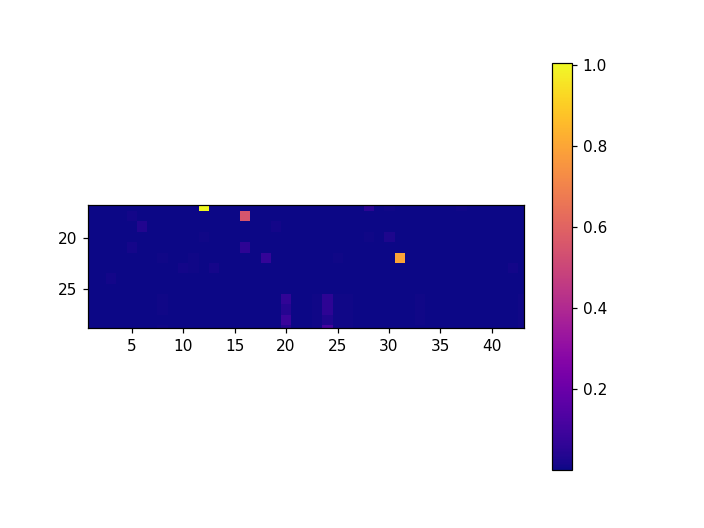

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


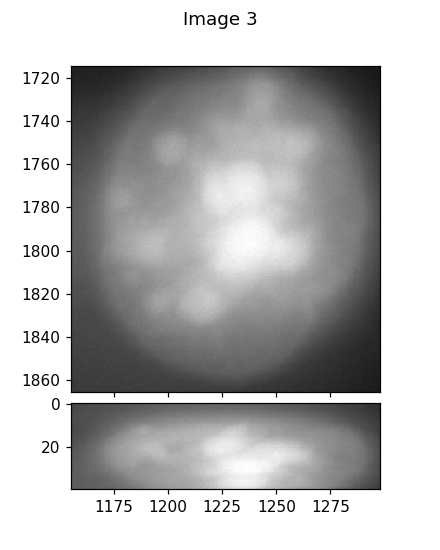

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new